<a href="https://colab.research.google.com/github/vernonconnelldavies/20025299_DataAnalytics/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following data was sourced from Big Query from Google, weather data was merged with traffic collision data to create a large dataset (see below). The timeframe is from 2012 to the current year of 2024. The number of collisions data are obviously only reported collisions as made to the local New York City authorities.
This report looks at how weather affects number of collisions in New York city in the pre Covid period. Later it also produces a linear regression prediction model and a deep neural network. These models take the data we have and allow us to predict for new inputs the corresponding output.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(dplyr)

In [3]:
collisions<-read.csv("https://raw.githubusercontent.com/vernonconnelldavies/20025299_DataAnalytics/refs/heads/main/Upload%20Assignment%20Guide%20CSV.csv",stringsAsFactors = TRUE)

In [4]:
head(collisions)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,538
2,1,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,564
3,2,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,664
4,3,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,432
5,4,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,591
6,5,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,638


In [5]:
summary(collisions)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2015   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2018   Median : 7.000   Median :16.00  
 Mean   :4.001   Mean   :2018   Mean   : 6.549   Mean   :15.71  
 3rd Qu.:6.000   3rd Qu.:2021   3rd Qu.: 9.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2024   Max.   :12.000   Max.   :31.00  
                                                                
    collision_date      temp            dewp             slp       
 2012-07-01:   1   Min.   : 6.90   Min.   :-16.10   Min.   :  989  
 2012-07-02:   1   1st Qu.:42.80   1st Qu.: 27.50   1st Qu.: 1012  
 2012-07-03:   1   Median :57.50   Median : 43.70   Median : 1017  
 2012-07-04:   1   Mean   :56.54   Mean   : 42.16   Mean   : 1067  
 2012-07-05:   1   3rd Qu.:71.90   3rd Qu.: 58.10   3rd Qu.: 1022  
 2012-07-06:   1   Max.   :89.10   Max.   : 74.80   Max.   :10000  
 (Ot

In [6]:
nrow(collisions)

[1] 4467

So we have 4467 data rows in our data set

In [7]:
collisions[order(collisions$collision_date,decreasing=TRUE),]

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
4467,7,2024,9,22,2024-09-22,66.8,52.1,1016.1,10.0,5.5,8.9,15.9,79.0,61.0,0.00,999.9,0,172
4466,6,2024,9,21,2024-09-21,69.5,55.5,1015.5,10.0,5.6,9.9,15.9,81.0,63.0,0.00,999.9,0,182
4465,5,2024,9,20,2024-09-20,73.4,59.0,1012.9,10.0,5.6,11.1,18.1,84.0,66.9,0.00,999.9,0,196
4464,4,2024,9,19,2024-09-19,74.4,57.7,1012.8,10.0,4.5,8.9,15.0,84.0,66.9,0.00,999.9,0,238
4463,3,2024,9,18,2024-09-18,70.1,59.4,1018.7,10.0,4.9,8.9,15.0,79.0,64.9,0.00,999.9,0,206
4462,2,2024,9,17,2024-09-17,69.9,59.5,1023.5,10.0,3.9,8.0,999.9,79.0,60.1,0.00,999.9,0,224
4461,1,2024,9,16,2024-09-16,67.1,52.5,1026.6,10.0,4.5,9.9,14.0,80.1,60.1,0.00,999.9,0,288
4460,7,2024,9,15,2024-09-15,72.1,58.8,1026.6,10.0,3.8,8.9,999.9,82.9,64.9,0.00,999.9,0,249
4459,6,2024,9,14,2024-09-14,73.0,60.5,1023.8,9.5,2.1,7.0,999.9,82.9,63.0,0.00,999.9,0,263


we can see our data begins on the 1st of July 2012 and ends 22nd of September 2024 (when this data was extracted)

Here is some details about the weather abbreviations:

temp - Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9

dewp - Mean dew point for the day in degreesm Fahrenheit to tenths. Missing = 9999.9

slp - Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9

visib - Mean visibility for the day in miles to tenths. Missing = 999.9

wdsp - Mean wind speed for the day in knots to tenths. Missing = 999.9

mxpsd - Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9

gust - Maximum wind gust reported for the day in knots to tenths. Missing = 999.9

max - Maximum temperature reported during the day in Fahrenheit to tenths--time of max temp report varies by country and region, so this will sometimes not be the max for the calendar day. Missing = 9999.9

min - Minimum temperature reported during the day in Fahrenheit to tenths--time of min temp report varies by country and region, so this will sometimes not be the min for the calendar day. Missing = 9999.9

prcp - Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; will usually not end with the midnight observation--i.e., may include latter part of previous day. .00 indicates no measurable precipitation (includes a trace). Missing = 99.99 Note: Many stations do not report '0' on days with no precipitation--therefore, '99.99' will often appear on these days. Also, for example, a station may only report a 6-hour amount for the period during which rain fell. See Flag field for source of data

sndp - Snow depth in inches to tenths--last report for the day if reported more than once. Missing = 999.9 Note: Most stations do not report '0' ondays with no snow on the ground--therefore, '999.9' will often appear on these days

fog - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day

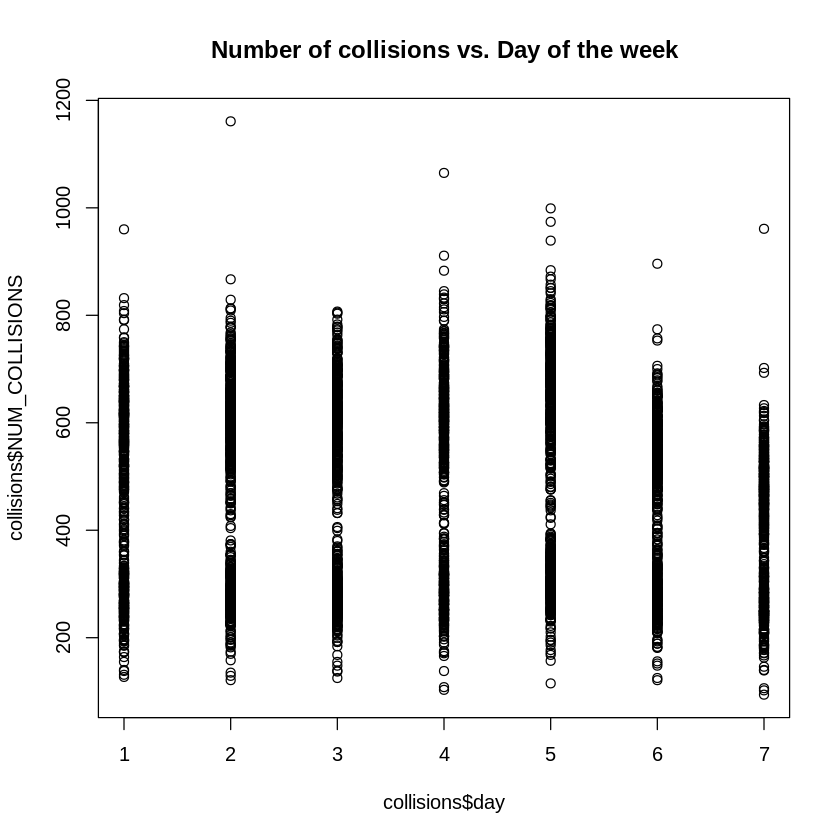

In [8]:
plot(collisions$day, collisions$NUM_COLLISIONS, main="Number of collisions vs. Day of the week")

from this graph since Monday=1 and Sunday=7 we can see there are fewer collisions on the weekend (6 and 7). Obviously Monday to Friday are working days in New York City and Saturday and Sundays are often days off in traditional American culture. An interesting question is how is the volume of traffic at key chokepoints such as the Brooklyn bridge varies over the days of the week?

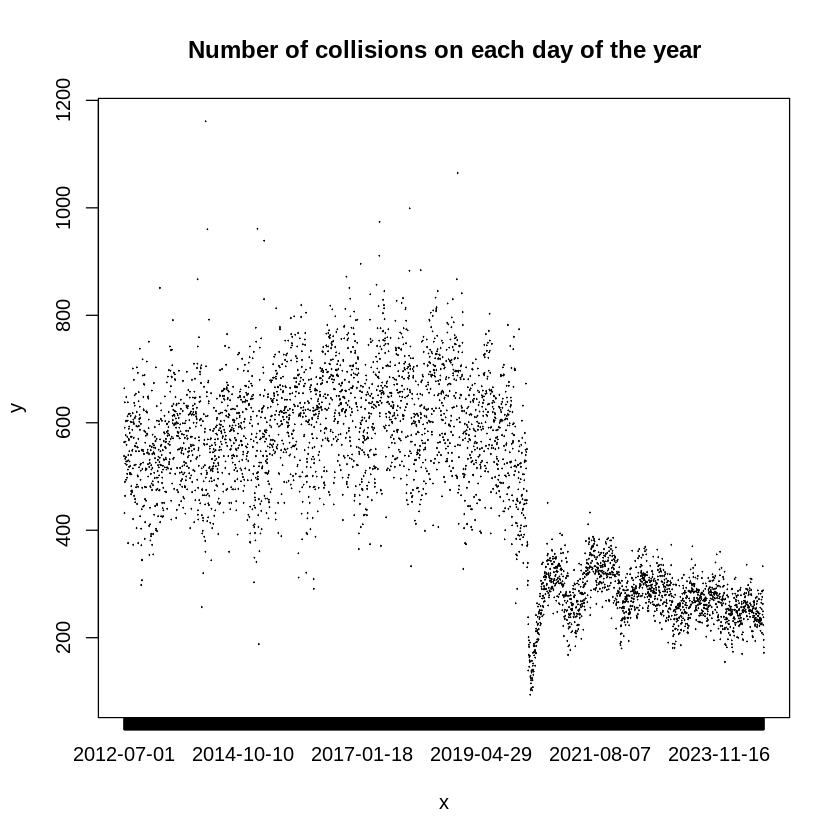

In [9]:
plot(collisions$collision_date, collisions$NUM_COLLISIONS, main="Number of collisions on each day of the year")

In [10]:
pre_covid<-collisions$collision_date[0:365]

In [11]:
pre_covid

[1] 2012-07-01 2012-07-02 2012-07-03 2012-07-04 2012-07-05 2012-07-06
  [7] 2012-07-07 2012-07-08 2012-07-09 2012-07-10 2012-07-11 2012-07-12
 [13] 2012-07-13 2012-07-14 2012-07-15 2012-07-16 2012-07-17 2012-07-18
 [19] 2012-07-19 2012-07-20 2012-07-21 2012-07-22 2012-07-23 2012-07-24
 [25] 2012-07-25 2012-07-26 2012-07-27 2012-07-28 2012-07-29 2012-07-30
 [31] 2012-07-31 2012-08-01 2012-08-02 2012-08-03 2012-08-04 2012-08-05
 [37] 2012-08-06 2012-08-07 2012-08-08 2012-08-09 2012-08-10 2012-08-11
 [43] 2012-08-12 2012-08-13 2012-08-14 2012-08-15 2012-08-16 2012-08-17
 [49] 2012-08-18 2012-08-19 2012-08-20 2012-08-21 2012-08-22 2012-08-23
 [55] 2012-08-24 2012-08-25 2012-08-26 2012-08-27 2012-08-28 2012-08-29
 [61] 2012-08-30 2012-08-31 2012-09-01 2012-09-02 2012-09-03 2012-09-04
 [67] 2012-09-05 2012-09-06 2012-09-07 2012-09-08 2012-09-09 2012-09-10
 [73] 2012-09-11 2012-09-12 2012-09-13 2012-09-14 2012-09-15 2012-09-16
 [79] 2012-09-17 2012-09-18 2012-09-19 2012-09-20 2012-09-21 2012-09-22
 [85] 2012-09-23 2012-09-24 2012-09-25 2012-09-26 2012-09-27 2012-09-28
 [91] 2012-09-29 2012-09-30 2012-10-01 2012-10-02 2012-10-03 2012-10-04
 [97] 2012-10-05 2012-10-06 2012-10-07 2012-10-08 2012-10-09 2012-10-10
[103] 2012-10-11 2012-10-12 2012-10-13 2012-10-14 2012-10-15 2012-10-16
[109] 2012-10-17 2012-10-18 2012-10-19 2012-10-20 2012-10-21 2012-10-22
[115] 2012-10-23 2012-10-24 2012-10-25 2012-10-26 2012-10-27 2012-10-28
[121] 2012-10-29 2012-10-30 2012-10-31 2012-11-01 2012-11-02 2012-11-03
[127] 2012-11-04 2012-11-05 2012-11-06 2012-11-07 2012-11-08 2012-11-09
[133] 2012-11-10 2012-11-11 2012-11-12 2012-11-13 2012-11-14 2012-11-15
[139] 2012-11-16 2012-11-17 2012-11-18 2012-11-19 2012-11-20 2012-11-21
[145] 2012-11-22 2012-11-23 2012-11-24 2012-11-25 2012-11-26 2012-11-27
[151] 2012-11-28 2012-11-29 2012-11-30 2012-12-01 2012-12-02 2012-12-03
[157] 2012-12-04 2012-12-05 2012-12-06 2012-12-07 2012-12-08 2012-12-09
[163] 2012-12-10 2012-12-11 2012-12-12 2012-12-13 2012-12-14 2012-12-15
[169] 2012-12-16 2012-12-17 2012-12-18 2012-12-19 2012-12-20 2012-12-21
[175] 2012-12-22 2012-12-23 2012-12-24 2012-12-25 2012-12-26 2012-12-27
[181] 2012-12-28 2012-12-29 2012-12-30 2012-12-31 2013-01-01 2013-01-02
[187] 2013-01-03 2013-01-04 2013-01-05 2013-01-06 2013-01-07 2013-01-08
[193] 2013-01-09 2013-01-10 2013-01-11 2013-01-12 2013-01-13 2013-01-14
[199] 2013-01-15 2013-01-16 2013-01-17 2013-01-18 2013-01-19 2013-01-20
[205] 2013-01-21 2013-01-22 2013-01-23 2013-01-24 2013-01-25 2013-01-26
[211] 2013-01-27 2013-01-28 2013-01-29 2013-01-30 2013-01-31 2013-02-01
[217] 2013-02-02 2013-02-03 2013-02-04 2013-02-05 2013-02-06 2013-02-07
[223] 2013-02-08 2013-02-09 2013-02-10 2013-02-11 2013-02-12 2013-02-13
[229] 2013-02-14 2013-02-15 2013-02-16 2013-02-17 2013-02-18 2013-02-19
[235] 2013-02-20 2013-02-21 2013-02-22 2013-02-23 2013-02-24 2013-02-25
[241] 2013-02-26 2013-02-27 2013-02-28 2013-03-01 2013-03-02 2013-03-03
[247] 2013-03-04 2013-03-05 2013-03-06 2013-03-07 2013-03-08 2013-03-09
[253] 2013-03-10 2013-03-11 2013-03-12 2013-03-13 2013-03-14 2013-03-15
[259] 2013-03-16 2013-03-17 2013-03-18 2013-03-19 2013-03-20 2013-03-21
[265] 2013-03-22 2013-03-23 2013-03-24 2013-03-25 2013-03-26 2013-03-27
[271] 2013-03-28 2013-03-29 2013-03-30 2013-03-31 2013-04-01 2013-04-02
[277] 2013-04-03 2013-04-04 2013-04-05 2013-04-06 2013-04-07 2013-04-08
[283] 2013-04-09 2013-04-10 2013-04-11 2013-04-12 2013-04-13 2013-04-14
[289] 2013-04-15 2013-04-16 2013-04-17 2013-04-18 2013-04-19 2013-04-20
[295] 2013-04-21 2013-04-22 2013-04-23 2013-04-24 2013-04-25 2013-04-26
[301] 2013-04-27 2013-04-28 2013-04-29 2013-04-30 2013-05-01 2013-05-02
[307] 2013-05-03 2013-05-04 2013-05-05 2013-05-06 2013-05-07 2013-05-08
[313] 2013-05-09 2013-05-10 2013-05-11 2013-05-12 2013-05-13 2013-05-14
[319] 2013-05-15 2013-05-16 2013-05-17 2013-05-18 2013-05-19 2013-05-20
[325] 2013-05-21 2013-05-22 2013-05-23 2013-05-24 2013-05-25 2013-05-26
[331] 2013-05-27 2013-05-28 2013-05-29 201

we will take only full years worth of data, 2013 starts at 2013-01-01, our data starts in July 1st, so there is 31 days in July, 31 days in August, 30 days in September, 31 days in October, 30 days in November and 31 days in December. Add these together to get 184.

In [12]:
pre_covid_2nd<-collisions$collision_date[184:365]

In [13]:
pre_covid_2nd

[1] 2012-12-31 2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05
  [7] 2013-01-06 2013-01-07 2013-01-08 2013-01-09 2013-01-10 2013-01-11
 [13] 2013-01-12 2013-01-13 2013-01-14 2013-01-15 2013-01-16 2013-01-17
 [19] 2013-01-18 2013-01-19 2013-01-20 2013-01-21 2013-01-22 2013-01-23
 [25] 2013-01-24 2013-01-25 2013-01-26 2013-01-27 2013-01-28 2013-01-29
 [31] 2013-01-30 2013-01-31 2013-02-01 2013-02-02 2013-02-03 2013-02-04
 [37] 2013-02-05 2013-02-06 2013-02-07 2013-02-08 2013-02-09 2013-02-10
 [43] 2013-02-11 2013-02-12 2013-02-13 2013-02-14 2013-02-15 2013-02-16
 [49] 2013-02-17 2013-02-18 2013-02-19 2013-02-20 2013-02-21 2013-02-22
 [55] 2013-02-23 2013-02-24 2013-02-25 2013-02-26 2013-02-27 2013-02-28
 [61] 2013-03-01 2013-03-02 2013-03-03 2013-03-04 2013-03-05 2013-03-06
 [67] 2013-03-07 2013-03-08 2013-03-09 2013-03-10 2013-03-11 2013-03-12
 [73] 2013-03-13 2013-03-14 2013-03-15 2013-03-16 2013-03-17 2013-03-18
 [79] 2013-03-19 2013-03-20 2013-03-21 2013-03-22 2013-03-23 2013-03-24
 [85] 2013-03-25 2013-03-26 2013-03-27 2013-03-28 2013-03-29 2013-03-30
 [91] 2013-03-31 2013-04-01 2013-04-02 2013-04-03 2013-04-04 2013-04-05
 [97] 2013-04-06 2013-04-07 2013-04-08 2013-04-09 2013-04-10 2013-04-11
[103] 2013-04-12 2013-04-13 2013-04-14 2013-04-15 2013-04-16 2013-04-17
[109] 2013-04-18 2013-04-19 2013-04-20 2013-04-21 2013-04-22 2013-04-23
[115] 2013-04-24 2013-04-25 2013-04-26 2013-04-27 2013-04-28 2013-04-29
[121] 2013-04-30 2013-05-01 2013-05-02 2013-05-03 2013-05-04 2013-05-05
[127] 2013-05-06 2013-05-07 2013-05-08 2013-05-09 2013-05-10 2013-05-11
[133] 2013-05-12 2013-05-13 2013-05-14 2013-05-15 2013-05-16 2013-05-17
[139] 2013-05-18 2013-05-19 2013-05-20 2013-05-21 2013-05-22 2013-05-23
[145] 2013-05-24 2013-05-25 2013-05-26 2013-05-27 2013-05-28 2013-05-29
[151] 2013-05-30 2013-05-31 2013-06-01 2013-06-02 2013-06-03 2013-06-04
[157] 2013-06-05 2013-06-06 2013-06-07 2013-06-08 2013-06-09 2013-06-10
[163] 2013-06-11 2013-06-12 2013-06-13 2013-06-14 2013-06-15 2013-06-16
[169] 2013-06-17 2013-06-18 2013-06-19 2013-06-20 2013-06-21 2013-06-22
[175] 2013-06-23 2013-06-24 2013-06-25 2013-06-26 2013-06-27 2013-06-28
[181] 2013-06-29 2013-06-30
4467 Levels: 2012-07-01 2012-07-02 2012-07-03 2012-07-04 ... 2024-09-22

we are 1 out for some reason so we will change the code to [185:365]

In [14]:
pre_covid_3rd<-collisions$collision_date[185:365]

In [15]:
pre_covid_3rd

[1] 2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06
  [7] 2013-01-07 2013-01-08 2013-01-09 2013-01-10 2013-01-11 2013-01-12
 [13] 2013-01-13 2013-01-14 2013-01-15 2013-01-16 2013-01-17 2013-01-18
 [19] 2013-01-19 2013-01-20 2013-01-21 2013-01-22 2013-01-23 2013-01-24
 [25] 2013-01-25 2013-01-26 2013-01-27 2013-01-28 2013-01-29 2013-01-30
 [31] 2013-01-31 2013-02-01 2013-02-02 2013-02-03 2013-02-04 2013-02-05
 [37] 2013-02-06 2013-02-07 2013-02-08 2013-02-09 2013-02-10 2013-02-11
 [43] 2013-02-12 2013-02-13 2013-02-14 2013-02-15 2013-02-16 2013-02-17
 [49] 2013-02-18 2013-02-19 2013-02-20 2013-02-21 2013-02-22 2013-02-23
 [55] 2013-02-24 2013-02-25 2013-02-26 2013-02-27 2013-02-28 2013-03-01
 [61] 2013-03-02 2013-03-03 2013-03-04 2013-03-05 2013-03-06 2013-03-07
 [67] 2013-03-08 2013-03-09 2013-03-10 2013-03-11 2013-03-12 2013-03-13
 [73] 2013-03-14 2013-03-15 2013-03-16 2013-03-17 2013-03-18 2013-03-19
 [79] 2013-03-20 2013-03-21 2013-03-22 2013-03-23 2013-03-24 2013-03-25
 [85] 2013-03-26 2013-03-27 2013-03-28 2013-03-29 2013-03-30 2013-03-31
 [91] 2013-04-01 2013-04-02 2013-04-03 2013-04-04 2013-04-05 2013-04-06
 [97] 2013-04-07 2013-04-08 2013-04-09 2013-04-10 2013-04-11 2013-04-12
[103] 2013-04-13 2013-04-14 2013-04-15 2013-04-16 2013-04-17 2013-04-18
[109] 2013-04-19 2013-04-20 2013-04-21 2013-04-22 2013-04-23 2013-04-24
[115] 2013-04-25 2013-04-26 2013-04-27 2013-04-28 2013-04-29 2013-04-30
[121] 2013-05-01 2013-05-02 2013-05-03 2013-05-04 2013-05-05 2013-05-06
[127] 2013-05-07 2013-05-08 2013-05-09 2013-05-10 2013-05-11 2013-05-12
[133] 2013-05-13 2013-05-14 2013-05-15 2013-05-16 2013-05-17 2013-05-18
[139] 2013-05-19 2013-05-20 2013-05-21 2013-05-22 2013-05-23 2013-05-24
[145] 2013-05-25 2013-05-26 2013-05-27 2013-05-28 2013-05-29 2013-05-30
[151] 2013-05-31 2013-06-01 2013-06-02 2013-06-03 2013-06-04 2013-06-05
[157] 2013-06-06 2013-06-07 2013-06-08 2013-06-09 2013-06-10 2013-06-11
[163] 2013-06-12 2013-06-13 2013-06-14 2013-06-15 2013-06-16 2013-06-17
[169] 2013-06-18 2013-06-19 2013-06-20 2013-06-21 2013-06-22 2013-06-23
[175] 2013-06-24 2013-06-25 2013-06-26 2013-06-27 2013-06-28 2013-06-29
[181] 2013-06-30
4467 Levels: 2012-07-01 2012-07-02 2012-07-03 2012-07-04 ... 2024-09-22

now our data starts where we want it to we will add the rest of the years up until the end of 2019 (because Covid starts in 2020). We will add 365 for 2013, 365 for 2014, 365 for 2015, 365 for 2016, 365 for 2017, 365 for 2018, 365 for 2019. Giving a total of 2555. Add that to the original 185 gives 2740. We can adjust our answer after if it is not exactly right.

In [16]:
pre_covid_4th<-collisions$collision_date[185:2740]

In [17]:
pre_covid_4th

[1] 2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06
   [7] 2013-01-07 2013-01-08 2013-01-09 2013-01-10 2013-01-11 2013-01-12
  [13] 2013-01-13 2013-01-14 2013-01-15 2013-01-16 2013-01-17 2013-01-18
  [19] 2013-01-19 2013-01-20 2013-01-21 2013-01-22 2013-01-23 2013-01-24
  [25] 2013-01-25 2013-01-26 2013-01-27 2013-01-28 2013-01-29 2013-01-30
  [31] 2013-01-31 2013-02-01 2013-02-02 2013-02-03 2013-02-04 2013-02-05
  [37] 2013-02-06 2013-02-07 2013-02-08 2013-02-09 2013-02-10 2013-02-11
  [43] 2013-02-12 2013-02-13 2013-02-14 2013-02-15 2013-02-16 2013-02-17
  [49] 2013-02-18 2013-02-19 2013-02-20 2013-02-21 2013-02-22 2013-02-23
  [55] 2013-02-24 2013-02-25 2013-02-26 2013-02-27 2013-02-28 2013-03-01
  [61] 2013-03-02 2013-03-03 2013-03-04 2013-03-05 2013-03-06 2013-03-07
  [67] 2013-03-08 2013-03-09 2013-03-10 2013-03-11 2013-03-12 2013-03-13
  [73] 2013-03-14 2013-03-15 2013-03-16 2013-03-17 2013-03-18 2013-03-19
  [79] 2013-03-20 2013-03-21 2013-03-22 2013-03-23 2013-03-24 2013-03-25
  [85] 2013-03-26 2013-03-27 2013-03-28 2013-03-29 2013-03-30 2013-03-31
  [91] 2013-04-01 2013-04-02 2013-04-03 2013-04-04 2013-04-05 2013-04-06
  [97] 2013-04-07 2013-04-08 2013-04-09 2013-04-10 2013-04-11 2013-04-12
 [103] 2013-04-13 2013-04-14 2013-04-15 2013-04-16 2013-04-17 2013-04-18
 [109] 2013-04-19 2013-04-20 2013-04-21 2013-04-22 2013-04-23 2013-04-24
 [115] 2013-04-25 2013-04-26 2013-04-27 2013-04-28 2013-04-29 2013-04-30
 [121] 2013-05-01 2013-05-02 2013-05-03 2013-05-04 2013-05-05 2013-05-06
 [127] 2013-05-07 2013-05-08 2013-05-09 2013-05-10 2013-05-11 2013-05-12
 [133] 2013-05-13 2013-05-14 2013-05-15 2013-05-16 2013-05-17 2013-05-18
 [139] 2013-05-19 2013-05-20 2013-05-21 2013-05-22 2013-05-23 2013-05-24
 [145] 2013-05-25 2013-05-26 2013-05-27 2013-05-28 2013-05-29 2013-05-30
 [151] 2013-05-31 2013-06-01 2013-06-02 2013-06-03 2013-06-04 2013-06-05
 [157] 2013-06-06 2013-06-07 2013-06-08 2013-06-09 2013-06-10 2013-06-11
 [163] 2013-06-12 2013-06-13 2013-06-14 2013-06-15 2013-06-16 2013-06-17
 [169] 2013-06-18 2013-06-19 2013-06-20 2013-06-21 2013-06-22 2013-06-23
 [175] 2013-06-24 2013-06-25 2013-06-26 2013-06-27 2013-06-28 2013-06-29
 [181] 2013-06-30 2013-07-01 2013-07-02 2013-07-03 2013-07-04 2013-07-05
 [187] 2013-07-06 2013-07-07 2013-07-08 2013-07-09 2013-07-10 2013-07-11
 [193] 2013-07-12 2013-07-13 2013-07-14 2013-07-15 2013-07-16 2013-07-17
 [199] 2013-07-18 2013-07-19 2013-07-20 2013-07-21 2013-07-22 2013-07-23
 [205] 2013-07-24 2013-07-25 2013-07-26 2013-07-27 2013-07-28 2013-07-29
 [211] 2013-07-30 2013-07-31 2013-08-01 2013-08-02 2013-08-03 2013-08-04
 [217] 2013-08-05 2013-08-06 2013-08-07 2013-08-08 2013-08-09 2013-08-10
 [223] 2013-08-11 2013-08-12 2013-08-13 2013-08-14 2013-08-15 2013-08-16
 [229] 2013-08-17 2013-08-18 2013-08-19 2013-08-20 2013-08-21 2013-08-22
 [235] 2013-08-23 2013-08-24 2013-08-25 2013-08-26 2013-08-27 2013-08-28
 [241] 2013-08-29 2013-08-30 2013-08-31 2013-09-01 2013-09-02 2013-09-03
 [247] 2013-09-04 2013-09-05 2013-09-06 2013-09-07 2013-09-08 2013-09-09
 [253] 2013-09-10 2013-09-11 2013-09-12 2013-09-13 2013-09-14 2013-09-15
 [259] 2013-09-16 2013-09-17 2013-09-18 2013-09-19 2013-09-20 2013-09-21
 [265] 2013-09-22 2013-09-23 2013-09-24 2013-09-25 2013-09-26 2013-09-27
 [271] 2013-09-28 2013-09-29 2013-09-30 2013-10-01 2013-10-02 2013-10-03
 [277] 2013-10-04 2013-10-05 2013-10-06 2013-10-07 2013-10-08 2013-10-09
 [283] 2013-10-10 2013-10-11 2013-10-12 2013-10-13 2013-10-14 2013-10-15
 [289] 2013-10-16 2013-10-17 2013-10-18 2013-10-19 2013-10-20 2013-10-21
 [295] 2013-10-22 2013-10-23 2013-10-24 2013-10-25 2013-10-26 2013-10-27
 [301] 2013-10-28 2013-10-29 2013-10-30 2013-10-31 2013-11-01 2013-11-02
 [307] 2013-11-03 2013-11-04 2013-11-05 2013-11-06 2013-11-07 2013-11-08
 [313] 2013-11-09 2013-11-10 2013-11-11 2013-11-12 2013-11-13 2013-11-14
 [319] 2013-11-15 2013-11-16 2013-11-17 2013-11-18 2013-11-19 2013-11-20
 [325] 2013-11-21 2013-11-22 2013-11-23 2013-11-24 2013-11-25

perfect! Now to make the full modified pre covid from 2013 Jan 1st to 2019 Dec 31st dataset

In [18]:
pre_covid_5th<-collisions[c(185:2740),]

In [19]:
pre_covid_5th

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
185,2,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.00,999.9,0,381
186,3,2013,1,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.00,999.9,0,480
187,4,2013,1,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.00,999.9,0,549
188,5,2013,1,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.00,999.9,0,505
189,6,2013,1,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.00,999.9,0,389
190,7,2013,1,6,2013-01-06,38.3,25.0,1019.5,8.5,5.3,8.9,17.1,46.0,34.0,0.00,999.9,0,393
191,1,2013,1,7,2013-01-07,40.9,23.8,1022.6,10.0,5.7,11.1,17.1,45.0,37.0,0.00,999.9,0,521
192,2,2013,1,8,2013-01-08,40.7,25.4,1028.5,9.3,5.1,8.9,22.0,48.0,35.1,0.00,999.9,0,513
193,3,2013,1,9,2013-01-09,43.8,30.8,1026.3,7.8,3.7,9.9,15.9,48.9,39.0,0.00,999.9,0,487


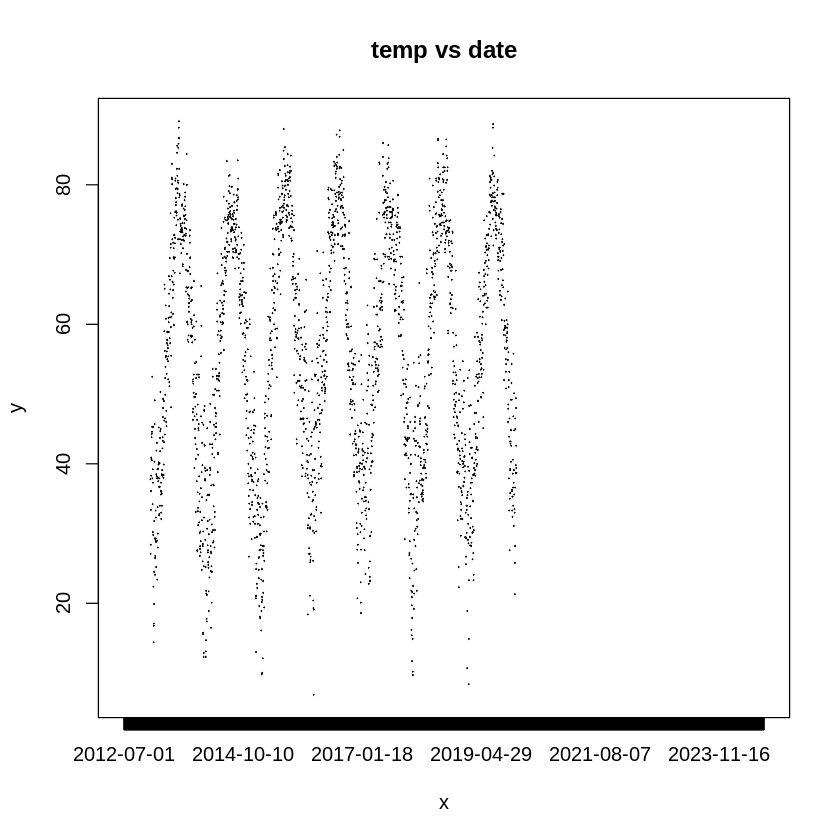

In [20]:
plot(pre_covid_5th$collision_date, pre_covid_5th$temp, main="temp vs date")

this is just a graph of how the temperature varies in New York city over the time period (2012 until 2024)

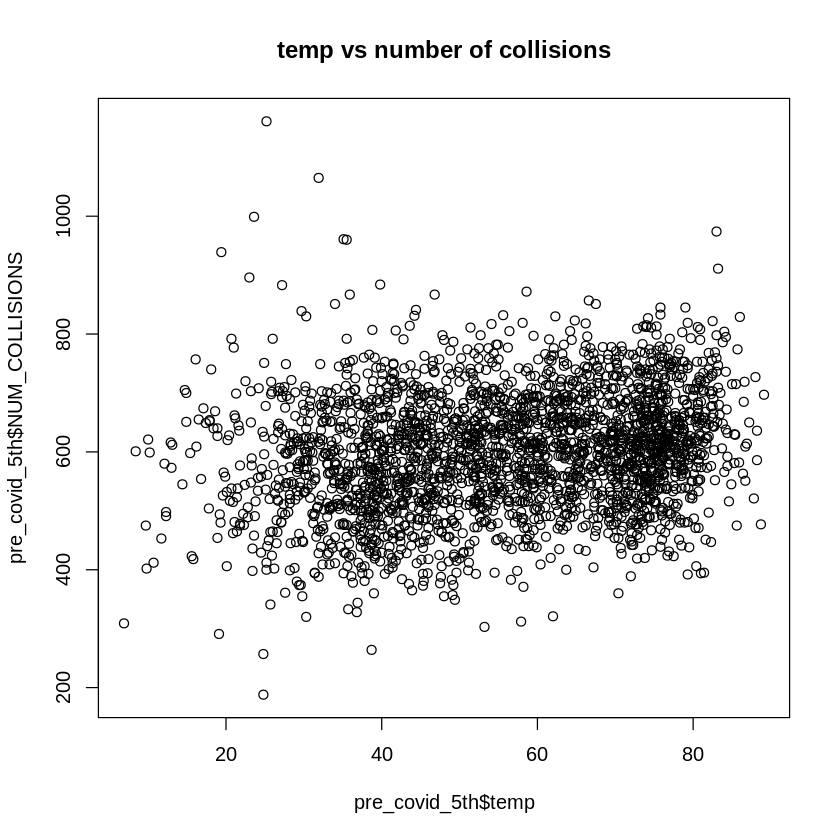

In [21]:
plot(pre_covid_5th$temp, pre_covid_5th$NUM_COLLISIONS, main="temp vs number of collisions")

the graph here is a chaotic but there are 2 clear sections (top section and bottom section) and there is what appears to be a linear correlation for this graph. There seems to be a weak correlation here

In [22]:
cor(pre_covid_5th$temp, pre_covid_5th$NUM_COLLISIONS)

[1] 0.2127472

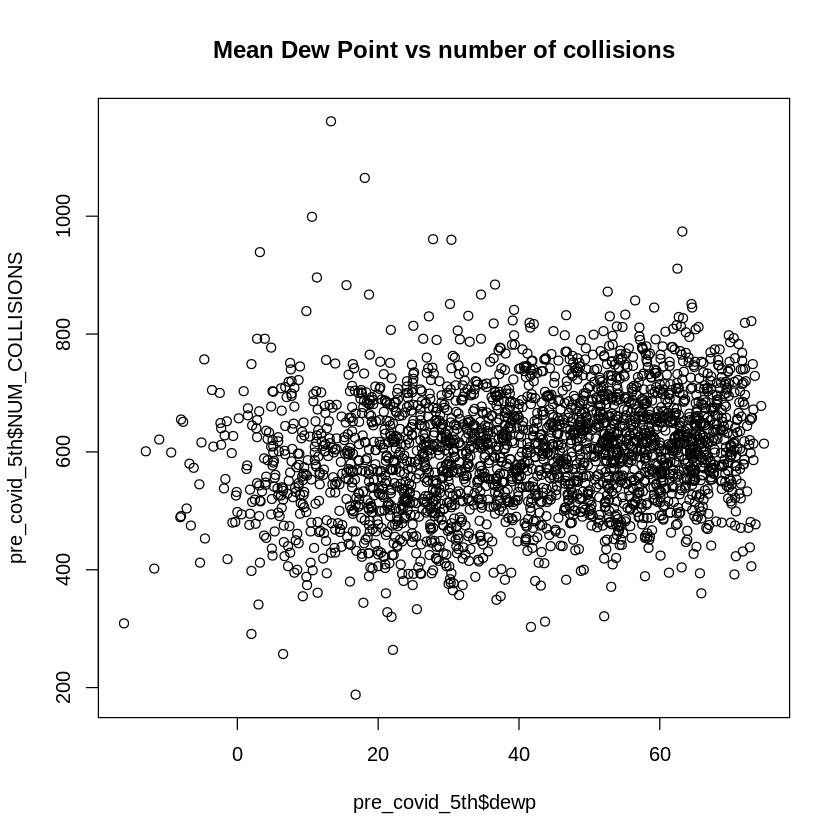

In [23]:
plot(pre_covid_5th$dewp, pre_covid_5th$NUM_COLLISIONS, main="Mean Dew Point vs number of collisions")

In [24]:
cor(pre_covid_5th$dewp, pre_covid_5th$NUM_COLLISIONS)

[1] 0.2046363

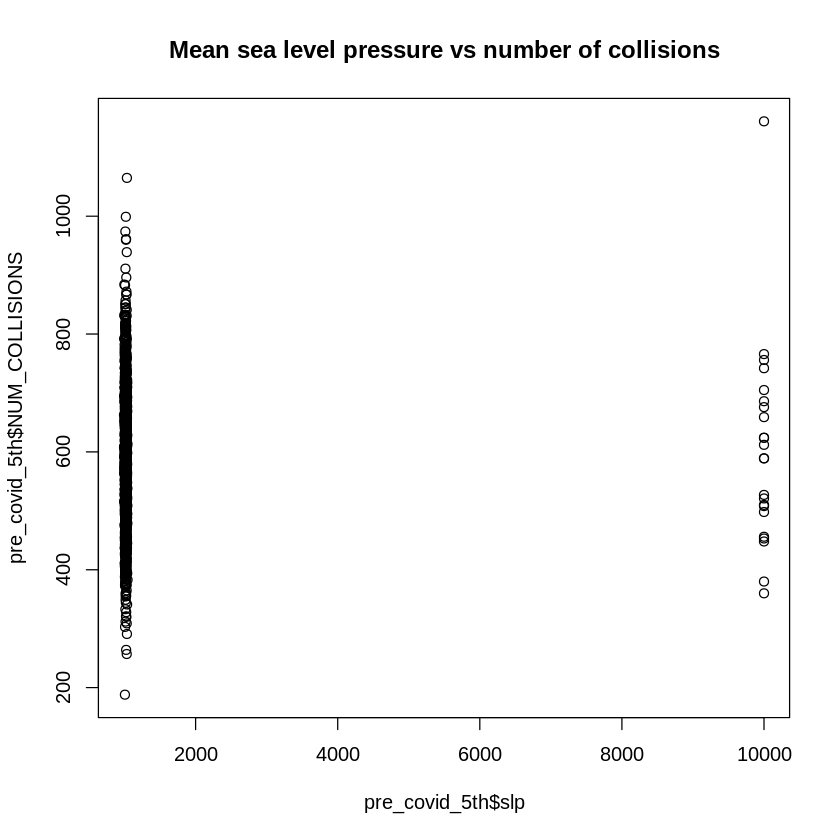

In [25]:
plot(pre_covid_5th$slp, pre_covid_5th$NUM_COLLISIONS, main="Mean sea level pressure vs number of collisions")

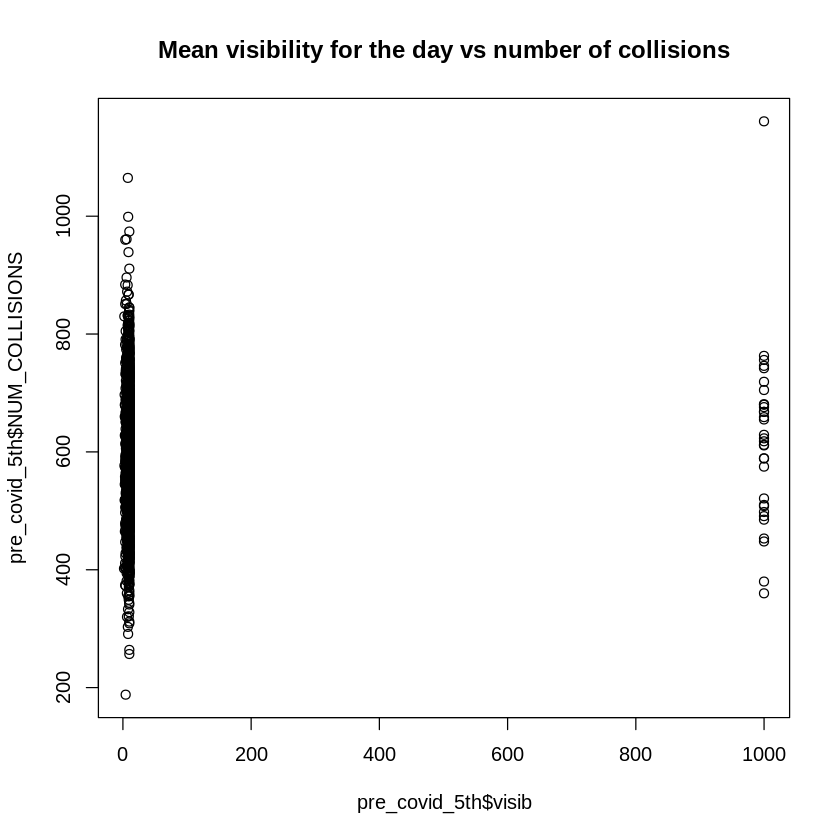

In [26]:
plot(pre_covid_5th$visib, pre_covid_5th$NUM_COLLISIONS, main="Mean visibility for the day vs number of collisions")

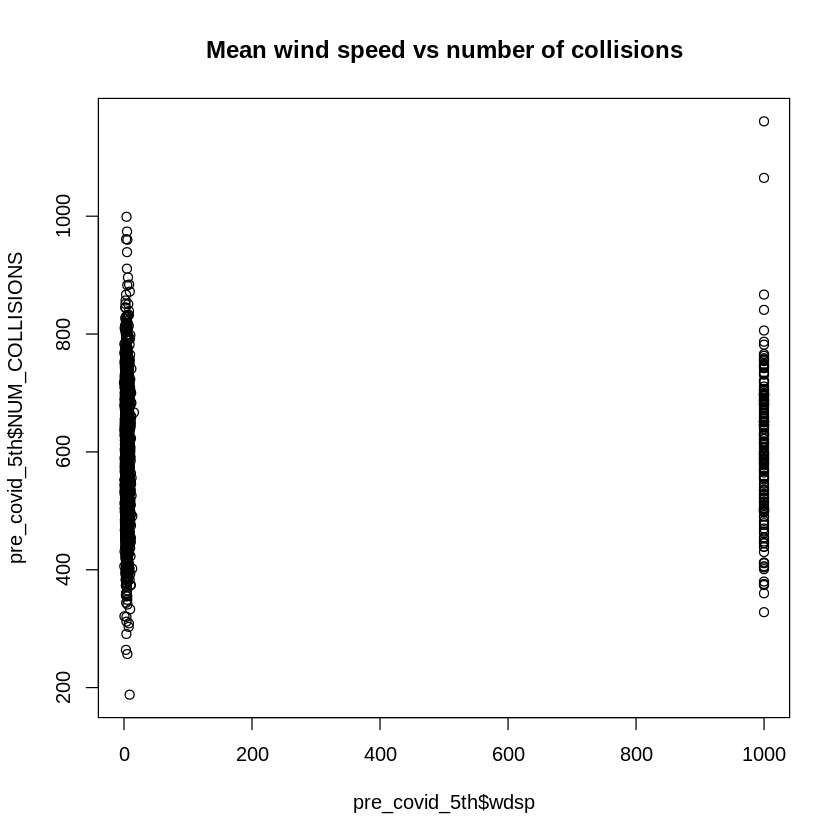

In [27]:
plot(pre_covid_5th$wdsp, pre_covid_5th$NUM_COLLISIONS, main="Mean wind speed vs number of collisions")

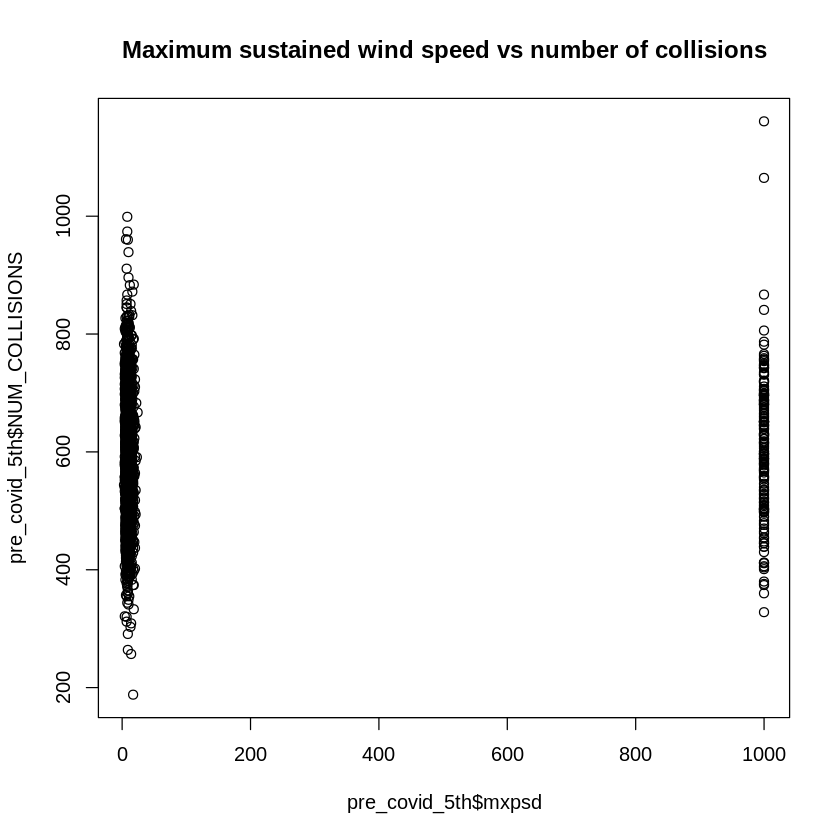

In [28]:
plot(pre_covid_5th$mxpsd, pre_covid_5th$NUM_COLLISIONS, main="Maximum sustained wind speed vs number of collisions")

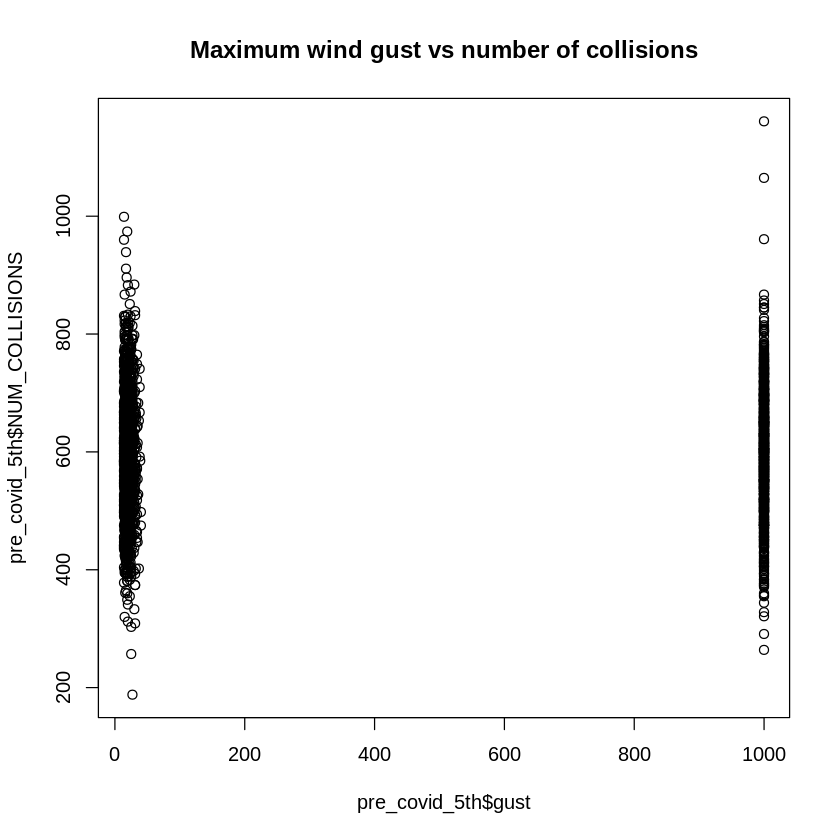

In [29]:
plot(pre_covid_5th$gust, pre_covid_5th$NUM_COLLISIONS, main="Maximum wind gust vs number of collisions")

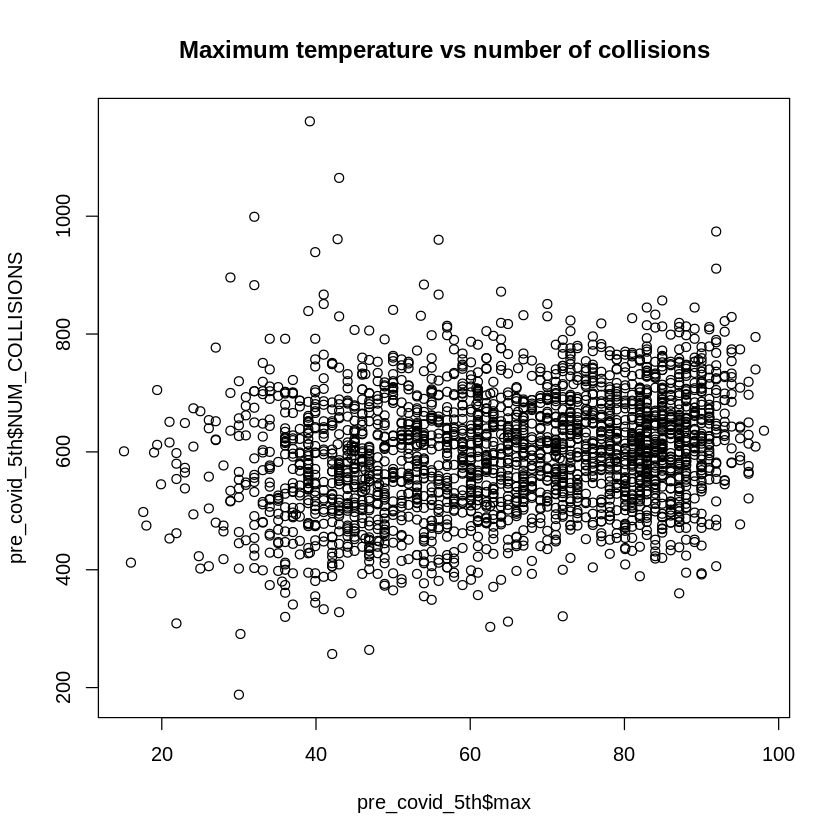

In [30]:
plot(pre_covid_5th$max, pre_covid_5th$NUM_COLLISIONS, main="Maximum temperature vs number of collisions")

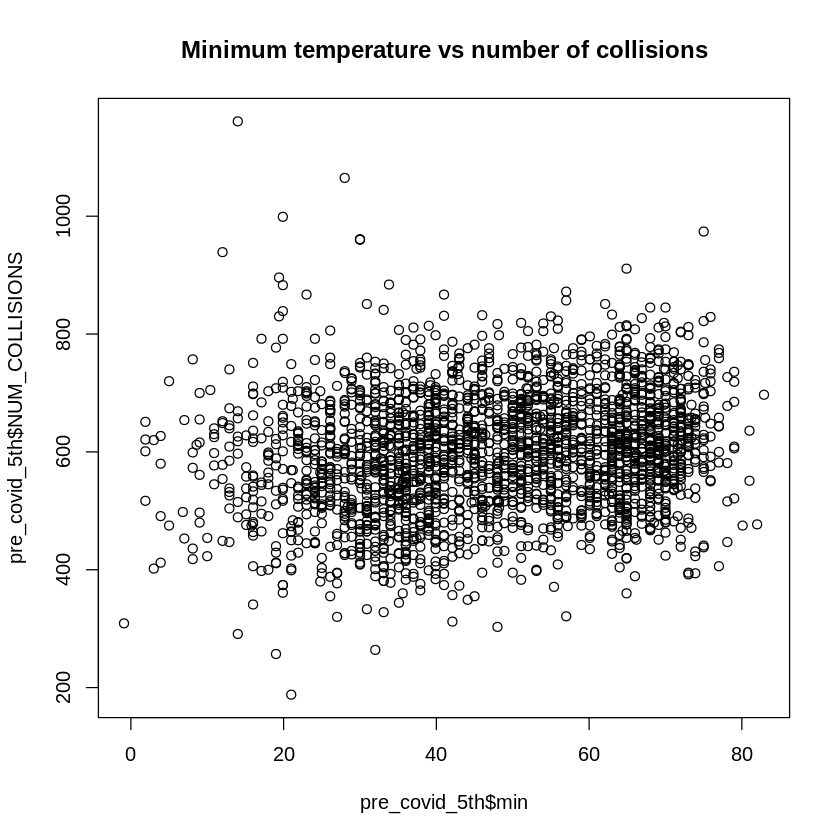

In [31]:
plot(pre_covid_5th$min, pre_covid_5th$NUM_COLLISIONS, main="Minimum temperature vs number of collisions")

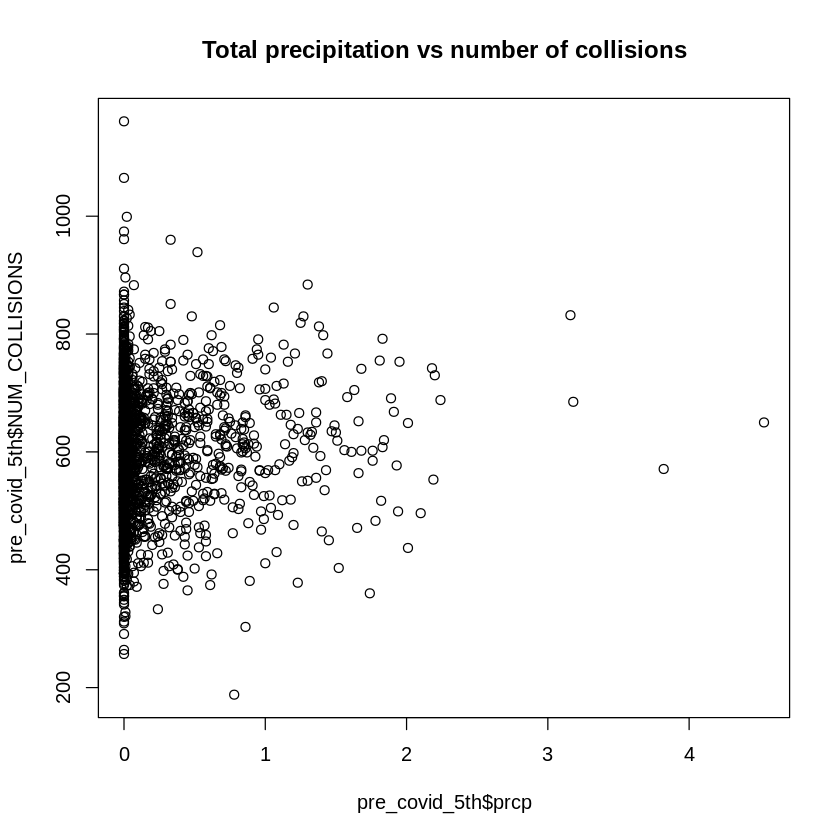

In [32]:
plot(pre_covid_5th$prcp, pre_covid_5th$NUM_COLLISIONS, main="Total precipitation vs number of collisions")

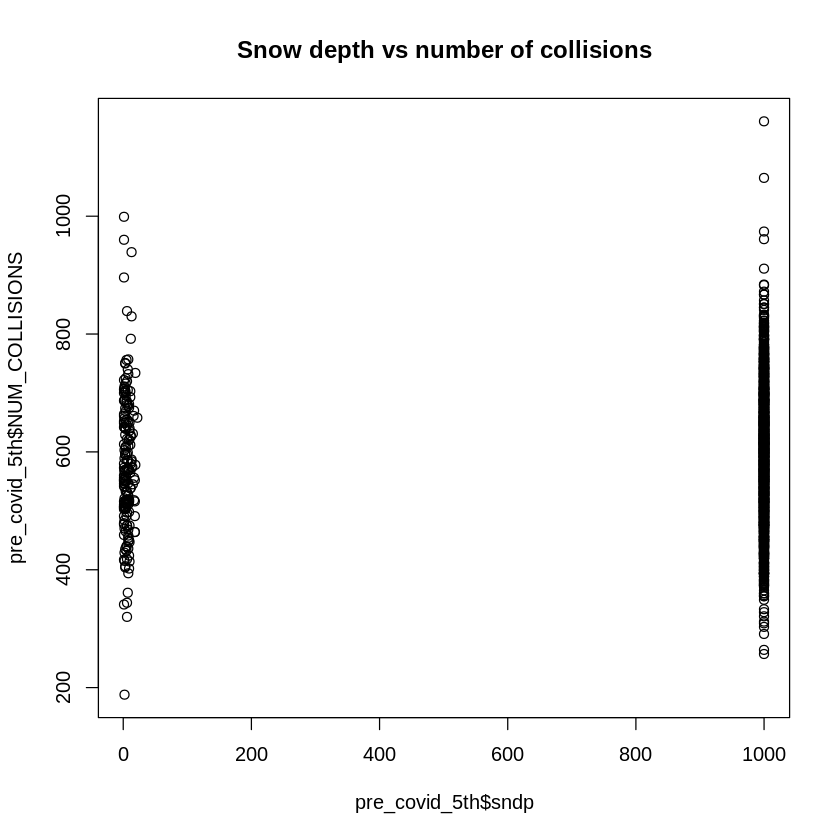

In [33]:
plot(pre_covid_5th$sndp, pre_covid_5th$NUM_COLLISIONS, main="Snow depth vs number of collisions")

Now we have looked at various weather factors we will look at whether the day of the week will impact it. First we will look at 2013 then 2014 then 2015.

In [34]:
pre_covid_2013<-collisions[c(185:550),]

In [35]:
pre_covid_2013

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
185,2,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.00,999.9,0,381
186,3,2013,1,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.00,999.9,0,480
187,4,2013,1,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.00,999.9,0,549
188,5,2013,1,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.00,999.9,0,505
189,6,2013,1,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.00,999.9,0,389
190,7,2013,1,6,2013-01-06,38.3,25.0,1019.5,8.5,5.3,8.9,17.1,46.0,34.0,0.00,999.9,0,393
191,1,2013,1,7,2013-01-07,40.9,23.8,1022.6,10.0,5.7,11.1,17.1,45.0,37.0,0.00,999.9,0,521
192,2,2013,1,8,2013-01-08,40.7,25.4,1028.5,9.3,5.1,8.9,22.0,48.0,35.1,0.00,999.9,0,513
193,3,2013,1,9,2013-01-09,43.8,30.8,1026.3,7.8,3.7,9.9,15.9,48.9,39.0,0.00,999.9,0,487


we can see here we are one day out, so we will use [186:549]

In [36]:
pre_covid_2013_2nd<-collisions[c(185:549),]

In [37]:
pre_covid_2013_2nd

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
185,2,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.00,999.9,0,381
186,3,2013,1,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.00,999.9,0,480
187,4,2013,1,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.00,999.9,0,549
188,5,2013,1,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.00,999.9,0,505
189,6,2013,1,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.00,999.9,0,389
190,7,2013,1,6,2013-01-06,38.3,25.0,1019.5,8.5,5.3,8.9,17.1,46.0,34.0,0.00,999.9,0,393
191,1,2013,1,7,2013-01-07,40.9,23.8,1022.6,10.0,5.7,11.1,17.1,45.0,37.0,0.00,999.9,0,521
192,2,2013,1,8,2013-01-08,40.7,25.4,1028.5,9.3,5.1,8.9,22.0,48.0,35.1,0.00,999.9,0,513
193,3,2013,1,9,2013-01-09,43.8,30.8,1026.3,7.8,3.7,9.9,15.9,48.9,39.0,0.00,999.9,0,487


perfect! Now to plot.

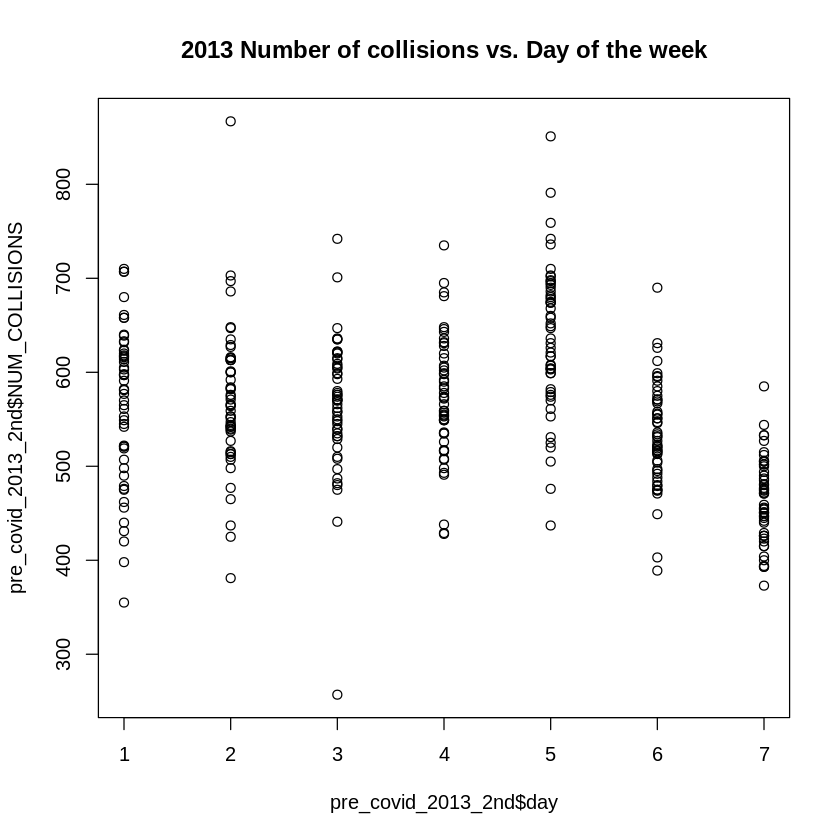

In [38]:
plot(pre_covid_2013_2nd$day, pre_covid_2013_2nd$NUM_COLLISIONS, main="2013 Number of collisions vs. Day of the week")

Now for 2014

In [39]:
pre_covid_2014<-collisions[c(550:914),]

In [40]:
pre_covid_2014

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
550,3,2014,1,1,2014-01-01,28.2,10.7,1026.8,10.0,5.1,8.9,20.0,33.1,21.0,0.00,999.9,0,399
551,4,2014,1,2,2014-01-02,28.5,19.6,1018.8,9.2,9.8,15.0,21.0,33.1,24.1,0.02,999.9,0,603
552,5,2014,1,3,2014-01-03,15.6,6.7,1014.9,3.8,10.1,15.0,25.1,24.8,10.0,0.58,999.9,1,423
553,6,2014,1,4,2014-01-04,15.8,-1.4,1031.0,10.0,4.0,8.0,17.1,28.0,8.1,0.02,5.9,0,418
554,7,2014,1,5,2014-01-05,30.3,21.9,1025.6,6.4,3.8,7.0,15.0,36.0,27.0,0.00,5.9,1,320
555,1,2014,1,6,2014-01-06,45.6,39.8,1002.6,3.6,6.3,11.1,22.9,55.0,35.6,0.23,3.9,1,518
556,2,2014,1,7,2014-01-07,12.3,-8.0,1015.6,999.9,13.0,19.0,31.1,36.0,3.9,0.27,1.2,0,491
557,3,2014,1,8,2014-01-08,12.9,-5.1,1031.1,10.0,6.3,11.1,20.0,21.0,9.0,0.00,999.9,0,616
558,4,2014,1,9,2014-01-09,25.3,5.4,1035.2,10.0,2.8,8.0,999.9,32.0,9.0,0.00,999.9,0,561


perfect! Now to plot

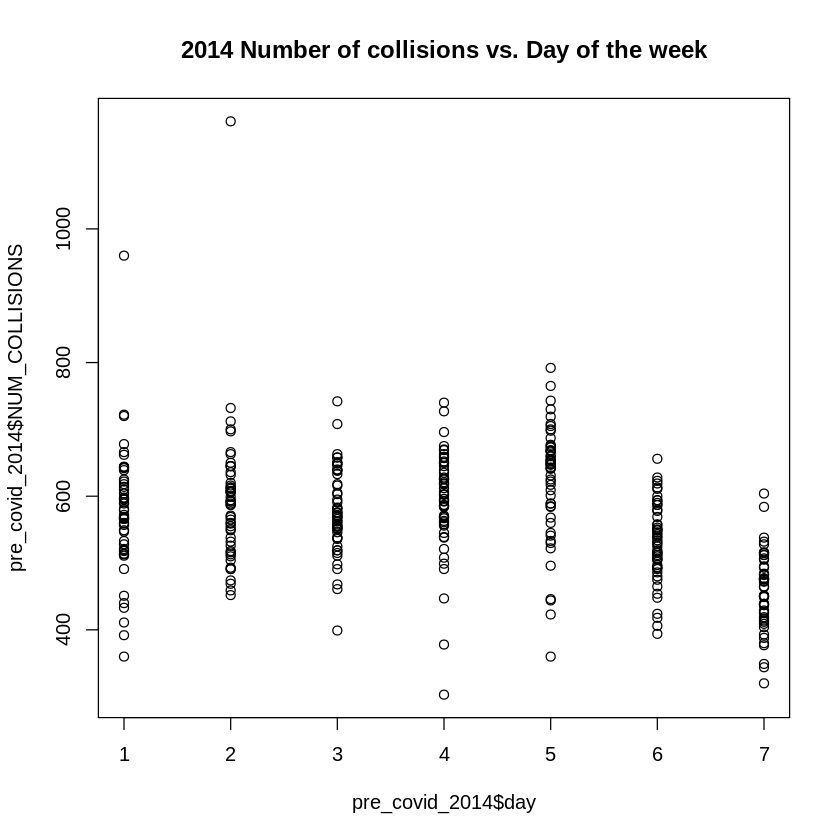

In [41]:
plot(pre_covid_2014$day, pre_covid_2014$NUM_COLLISIONS, main="2014 Number of collisions vs. Day of the week")

Now for 2015

In [42]:
pre_covid_2015<-collisions[c(915:1280),]

In [43]:
pre_covid_2015

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
915,4,2015,1,1,2015-01-01,31.4,8.1,1019.6,10.0,5.3,9.9,25.1,39.0,27.0,0.00,999.9,0,395
916,5,2015,1,2,2015-01-02,38.7,16.1,1020.5,10.0,7.0,9.9,20.0,42.1,27.0,0.00,999.9,0,442
917,6,2015,1,3,2015-01-03,35.5,22.4,1032.6,7.6,5.0,8.9,14.0,42.1,33.1,0.00,999.9,0,456
918,7,2015,1,4,2015-01-04,45.4,42.3,1010.6,5.8,5.1,8.9,19.0,55.9,33.1,0.89,999.9,0,381
919,1,2015,1,5,2015-01-05,40.9,19.1,1015.5,9.7,9.7,15.9,40.0,55.9,28.9,0.12,999.9,0,498
920,2,2015,1,6,2015-01-06,21.0,4.8,1026.7,7.3,4.2,9.9,22.0,27.0,19.0,0.00,999.9,0,777
921,3,2015,1,7,2015-01-07,20.7,5.7,1015.9,9.7,9.5,15.9,29.9,23.0,15.1,0.05,999.9,0,538
922,4,2015,1,8,2015-01-08,13.0,-6.2,1027.1,10.0,8.8,18.1,31.1,23.0,8.1,0.00,1.2,0,573
923,5,2015,1,9,2015-01-09,24.9,7.5,1019.3,8.7,7.4,14.0,21.0,33.1,16.0,0.00,999.9,0,751


out by 1 again

In [44]:
pre_covid_2015_2nd<-collisions[c(915:1279),]

In [45]:
pre_covid_2015_2nd

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
915,4,2015,1,1,2015-01-01,31.4,8.1,1019.6,10.0,5.3,9.9,25.1,39.0,27.0,0.00,999.9,0,395
916,5,2015,1,2,2015-01-02,38.7,16.1,1020.5,10.0,7.0,9.9,20.0,42.1,27.0,0.00,999.9,0,442
917,6,2015,1,3,2015-01-03,35.5,22.4,1032.6,7.6,5.0,8.9,14.0,42.1,33.1,0.00,999.9,0,456
918,7,2015,1,4,2015-01-04,45.4,42.3,1010.6,5.8,5.1,8.9,19.0,55.9,33.1,0.89,999.9,0,381
919,1,2015,1,5,2015-01-05,40.9,19.1,1015.5,9.7,9.7,15.9,40.0,55.9,28.9,0.12,999.9,0,498
920,2,2015,1,6,2015-01-06,21.0,4.8,1026.7,7.3,4.2,9.9,22.0,27.0,19.0,0.00,999.9,0,777
921,3,2015,1,7,2015-01-07,20.7,5.7,1015.9,9.7,9.5,15.9,29.9,23.0,15.1,0.05,999.9,0,538
922,4,2015,1,8,2015-01-08,13.0,-6.2,1027.1,10.0,8.8,18.1,31.1,23.0,8.1,0.00,1.2,0,573
923,5,2015,1,9,2015-01-09,24.9,7.5,1019.3,8.7,7.4,14.0,21.0,33.1,16.0,0.00,999.9,0,751


Perfect! Now to plot again.

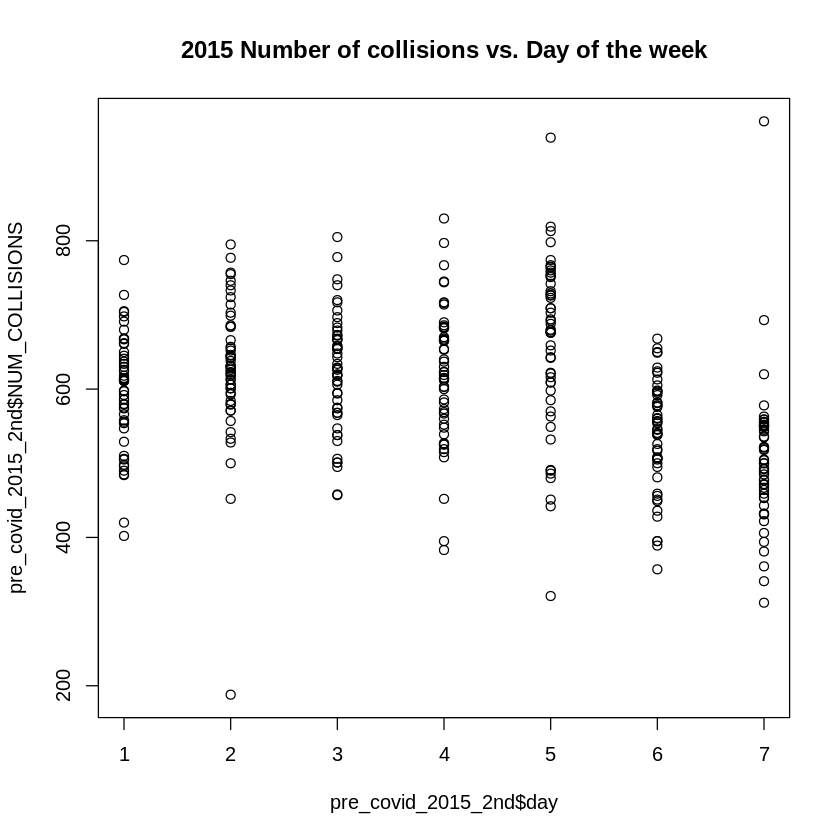

In [46]:
plot(pre_covid_2015_2nd$day, pre_covid_2015_2nd$NUM_COLLISIONS, main="2015 Number of collisions vs. Day of the week")

Now we can clearly see 2013, 2014 and 2015 days of the week versus number of collisions are similar graphs (for pre Covid). What about if we change the order of the days of the week to see if we can get a clear linear correlation? We will add +2 to each day of the week and then take 8 (Saturday) and 9 (Sunday) to the beginning for a clearer linear correlation.
First we will deal with 2013 then 2014 then 2015. We will use code provided by Russell and Max in class session 12th November

In [47]:
pre_covid_2013_2nd$day <- pre_covid_2013_2nd$day+2

In [48]:
pre_covid_2013_2nd$day[pre_covid_2013_2nd$day == 8] <- 2

In [49]:
pre_covid_2013_2nd$day[pre_covid_2013_2nd$day == 9] <- 1

Now to plot our result

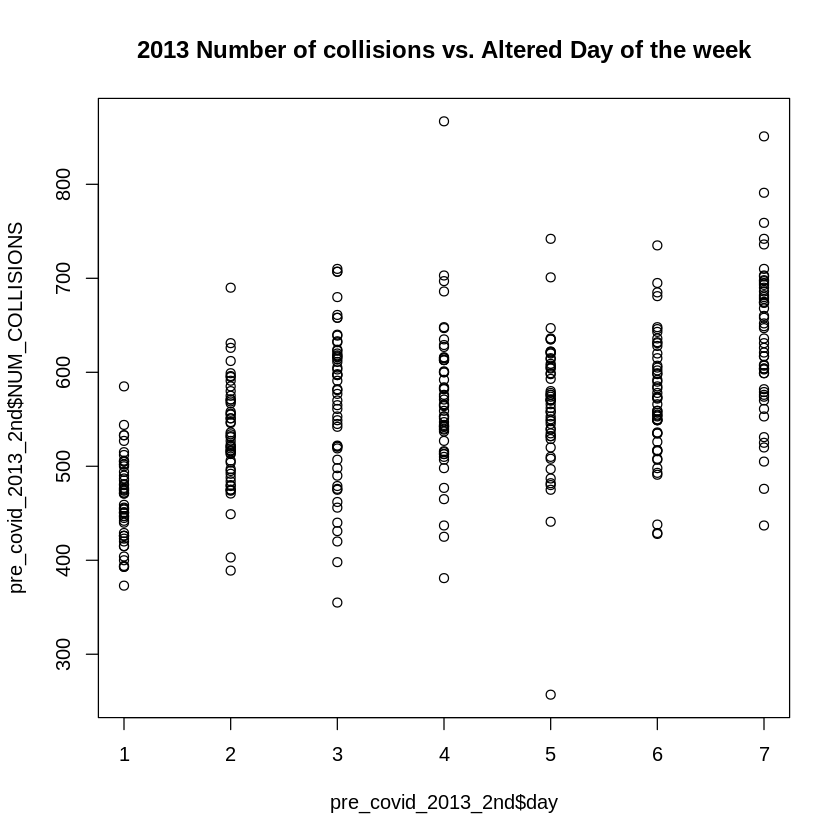

In [50]:
plot(pre_covid_2013_2nd$day, pre_covid_2013_2nd$NUM_COLLISIONS, main="2013 Number of collisions vs. Altered Day of the week")

Much better! Looking distinctly more like a straight line

In [51]:
cor(pre_covid_2013_2nd$day, pre_covid_2013_2nd$NUM_COLLISIONS)

[1] 0.5098989

In [52]:
head(pre_covid_2013_2nd)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
185,4,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0,999.9,0,381
186,5,2013,1,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0,999.9,0,480
187,6,2013,1,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0,999.9,0,549
188,7,2013,1,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0,999.9,0,505
189,2,2013,1,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0,999.9,0,389
190,1,2013,1,6,2013-01-06,38.3,25.0,1019.5,8.5,5.3,8.9,17.1,46.0,34.0,0,999.9,0,393


Now to repeat for 2014

going back to our total pre Covid data

In [55]:
pre_covid_5th

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
185,2,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.00,999.9,0,381
186,3,2013,1,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.00,999.9,0,480
187,4,2013,1,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.00,999.9,0,549
188,5,2013,1,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.00,999.9,0,505
189,6,2013,1,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.00,999.9,0,389
190,7,2013,1,6,2013-01-06,38.3,25.0,1019.5,8.5,5.3,8.9,17.1,46.0,34.0,0.00,999.9,0,393
191,1,2013,1,7,2013-01-07,40.9,23.8,1022.6,10.0,5.7,11.1,17.1,45.0,37.0,0.00,999.9,0,521
192,2,2013,1,8,2013-01-08,40.7,25.4,1028.5,9.3,5.1,8.9,22.0,48.0,35.1,0.00,999.9,0,513
193,3,2013,1,9,2013-01-09,43.8,30.8,1026.3,7.8,3.7,9.9,15.9,48.9,39.0,0.00,999.9,0,487


In [56]:
pre_covid_5th$day <- pre_covid_5th$day+2

In [57]:
pre_covid_5th$day[pre_covid_5th$day == 8] <- 2

In [58]:
pre_covid_5th$day[pre_covid_5th$day == 9] <- 1

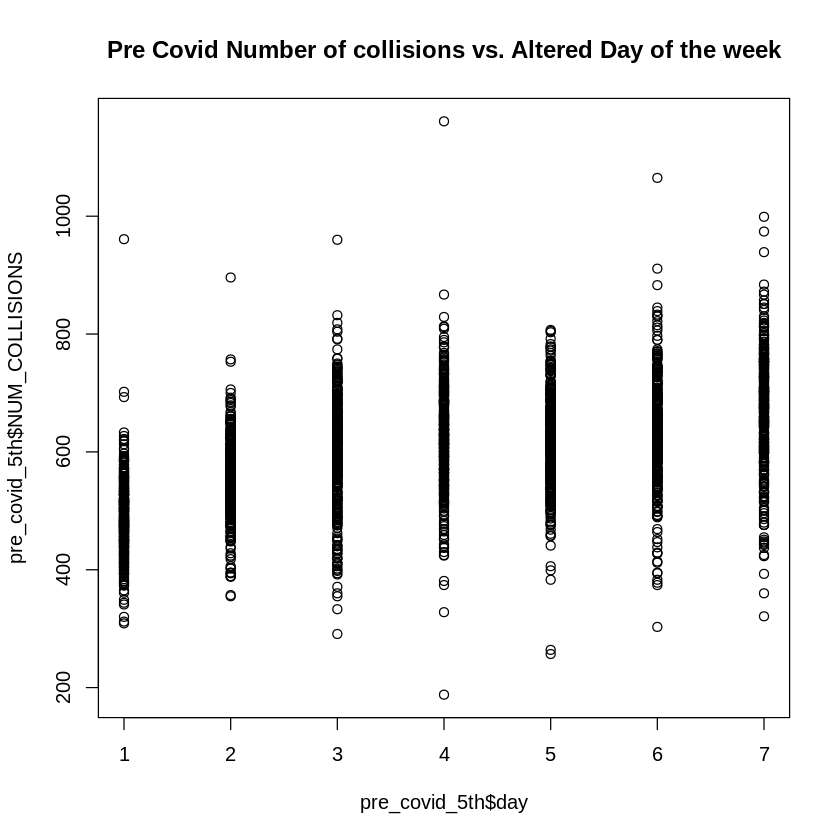

In [59]:
plot(pre_covid_5th$day, pre_covid_5th$NUM_COLLISIONS, main="Pre Covid Number of collisions vs. Altered Day of the week")

In [60]:
cor(pre_covid_5th$day, pre_covid_5th$NUM_COLLISIONS)

[1] 0.49967

In [61]:
write.csv(pre_covid_5th, file="/content/final_pre_covid_data.csv")

In [62]:
summary(pre_covid_5th)

      day         year            mo               da           collision_date
 Min.   :1   Min.   :2013   Min.   : 1.000   Min.   : 1.00   2013-01-01:   1  
 1st Qu.:2   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00   2013-01-02:   1  
 Median :4   Median :2016   Median : 7.000   Median :16.00   2013-01-03:   1  
 Mean   :4   Mean   :2016   Mean   : 6.524   Mean   :15.73   2013-01-04:   1  
 3rd Qu.:6   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00   2013-01-05:   1  
 Max.   :7   Max.   :2019   Max.   :12.000   Max.   :31.00   2013-01-06:   1  
                                                             (Other)   :2550  
      temp            dewp             slp              visib       
 Min.   : 6.90   Min.   :-16.10   Min.   :  992.1   Min.   :  1.70  
 1st Qu.:41.40   1st Qu.: 26.48   1st Qu.: 1012.6   1st Qu.:  8.50  
 Median :56.80   Median : 43.05   Median : 1017.1   Median :  9.80  
 Mean   :55.69   Mean   : 41.19   Mean   : 1098.0   Mean   : 21.38  
 3rd Qu.:71.60   3rd Qu

The Mean is 599.1 and the Median is 602

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


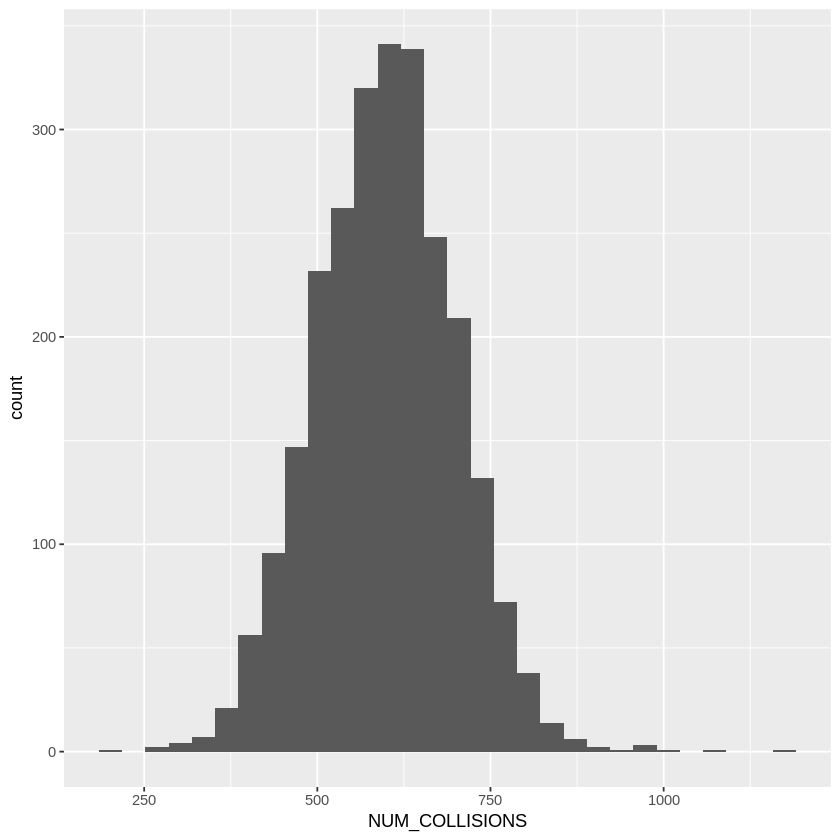

In [63]:
ggplot(pre_covid_5th,aes(x=NUM_COLLISIONS))+geom_histogram()

We can see there is a nice Normal distribution of the number of collisions (this is for pre Covid data)[link text](https://)

So far we have a weak correlation for temperature, a weak correlation for mean dew point and a decent correlation for days of week (with the order altered). Many of the other weather parameters have error data in them which has lead to strange graphs above. The error are logged as 999.99 which combined with the graph tool gives a ridiculous graph due to the scaling. This section will seek now to remove these error points. We will look at the weather parameters (columns) now in order, starting with mean sea level pressure (slp). Obviously the initial graph has something wrong happening. The error values are registering at about 10,000 and these values are making the graph look very strange. The area we are interested in is on the left side. So we need to remove the values at 10,000. First we will count how many of these error values we have. It is clear the machine reading the mean sea level pressure is obviously malfunctioning when such high values are recording, a value of 9999.9 is being input in such instances (we can deduce such from the max value in 'summary' being 9999.9 and also by looking at the graph). We will now find and remove these values and replace them with the median value of 1017.1.

For this operation I Googled the problem and found code on Stack Over Flow that worked.

https://stackoverflow.com/questions/1923273/counting-the-number-of-elements-with-the-values-of-x-in-a-vector
This solution produced errors however that Google Gemini was able to suggest solutions to. The 'slp' column had to be converted to numeric, then the count function was used to count the number of matches.

In [64]:
pre_covid_5th$slp <- as.numeric(as.character(pre_covid_5th$slp))

In [65]:
count(pre_covid_5th[pre_covid_5th$slp == 9999.9, ])

n
<int>
23


there are 23 error values in our data

In [66]:
pre_covid_5th$slp[pre_covid_5th$slp == 9999.9] <- 1017.1

We have changed the error values for the median with this piece of code

Now to plot it

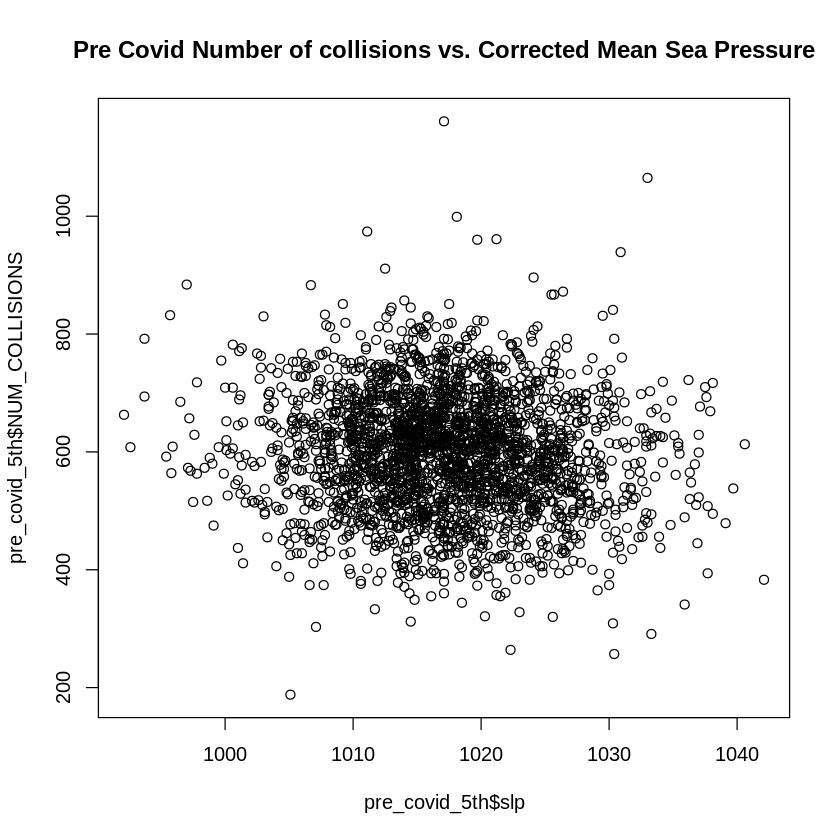

In [67]:
plot(pre_covid_5th$slp, pre_covid_5th$NUM_COLLISIONS, main="Pre Covid Number of collisions vs. Corrected Mean Sea Pressure")

Now we have a much more normal looking graph!

In [68]:
cor(pre_covid_5th$slp, pre_covid_5th$NUM_COLLISIONS)

[1] -0.08371456

Not a great correlation there, now we will look at visibility. This time 999.90 (error values) is being replaced with 9.80.

In [69]:
count(pre_covid_5th[pre_covid_5th$visib == 999.90, ])

n
<int>
32


We have 32 error values, now to replace with the median (9.8)

In [70]:
pre_covid_5th$visib[pre_covid_5th$visib == 999.90] <- 9.8

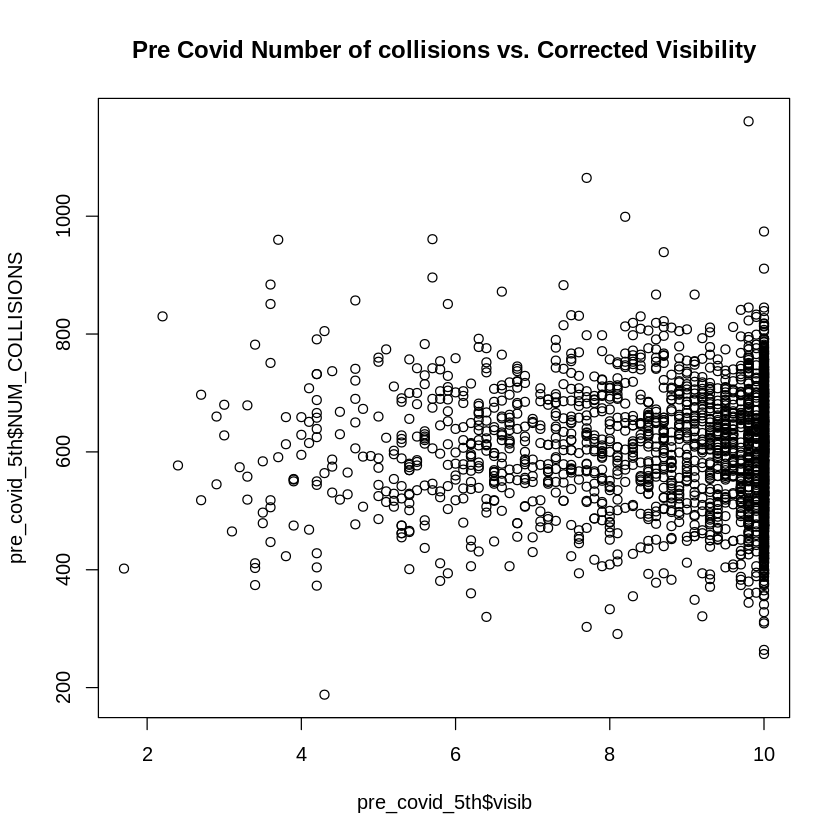

In [71]:
plot(pre_covid_5th$visib, pre_covid_5th$NUM_COLLISIONS, main="Pre Covid Number of collisions vs. Corrected Visibility")

In [72]:
cor(pre_covid_5th$visib, pre_covid_5th$NUM_COLLISIONS)

[1] -0.05902269

Again, not a good correlation. Now for Wind Speed. The median is 4.30 and the error values are at 999.90.

In [73]:
count(pre_covid_5th[pre_covid_5th$wdsp == 999.90, ])

n
<int>
172


There are 172 error values in this data set. Bear in mind there are 2740 values in the pre_covid_5th dataset. So about 6% of the data is error values.

In [74]:
pre_covid_5th$wdsp[pre_covid_5th$wdsp == 999.90] <- 4.3

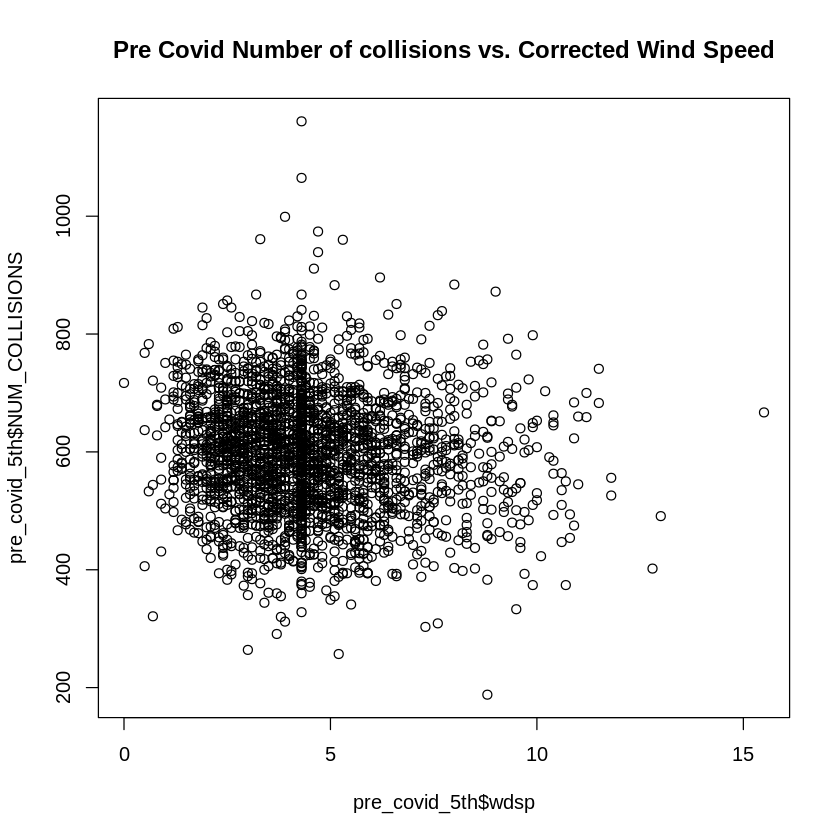

In [75]:
plot(pre_covid_5th$wdsp, pre_covid_5th$NUM_COLLISIONS, main="Pre Covid Number of collisions vs. Corrected Wind Speed")

In [76]:
cor(pre_covid_5th$wdsp, pre_covid_5th$NUM_COLLISIONS)

[1] -0.1019143

Again a poor correlation. Now on to 'mxpsd' which is 'Maximum sustained wind speed.' The median is 8.90 and the error values sit at 999.90 again.

In [77]:
count(pre_covid_5th[pre_covid_5th$mxpsd == 999.90, ])

n
<int>
172


Again 172 error values which we will remove to replace with the median.

In [78]:
pre_covid_5th$mxpsd[pre_covid_5th$mxpsd == 999.90] <- 8.9

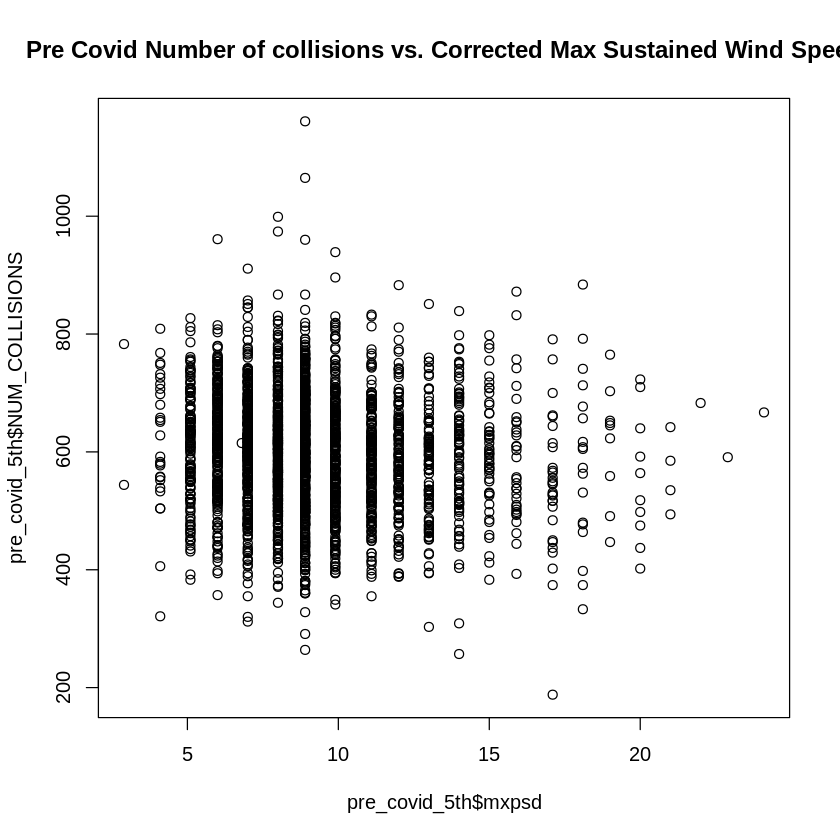

In [79]:
plot(pre_covid_5th$mxpsd, pre_covid_5th$NUM_COLLISIONS, main="Pre Covid Number of collisions vs. Corrected Max Sustained Wind Speed")

In [80]:
cor(pre_covid_5th$mxpsd, pre_covid_5th$NUM_COLLISIONS)

[1] -0.09213232

Now for Gust. The median is 409.6 and the error values sit again at 999.90.

In [81]:
count(pre_covid_5th[pre_covid_5th$gust == 999.90, ])

n
<int>
1016


This is quite a large number of error values. Since there are 2740 total rows of data in the dataset then 1016 is 37% of our data

In [82]:
pre_covid_5th$gust[pre_covid_5th$gust == 999.90] <- 409.6

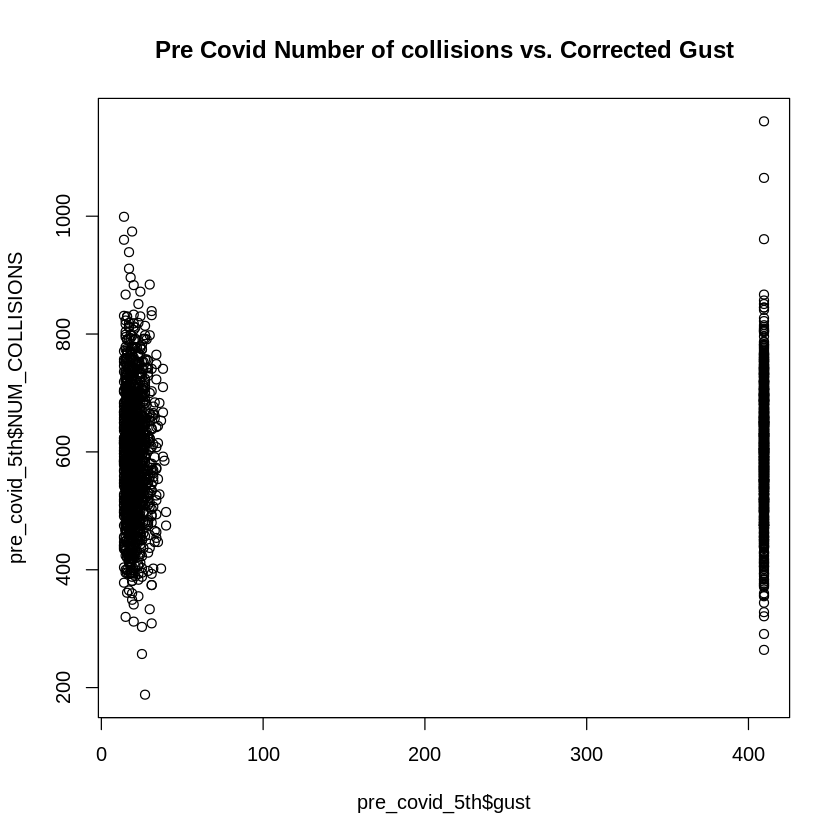

In [83]:
plot(pre_covid_5th$gust, pre_covid_5th$NUM_COLLISIONS, main="Pre Covid Number of collisions vs. Corrected Gust")

This graph is again very strange so we will leave it for now and continue on with our other weather parameters. Now for 'max' which is 'maximum temperature' and 'min' which is 'minimum temperature.' These graphs don't need to be corrected as we can see above.

In [84]:
cor(pre_covid_5th$max, pre_covid_5th$NUM_COLLISIONS)

[1] 0.2158644

So we have a weak correlation of maximum temperature with number of collisions.

In [85]:
cor(pre_covid_5th$min, pre_covid_5th$NUM_COLLISIONS)

[1] 0.1930448

Again another weak correlation for minimum temperature.

In [86]:
cor(pre_covid_5th$prcp, pre_covid_5th$NUM_COLLISIONS)

[1] 0.0624737

An even weaker correlation for total precipitation. Now for snow depth, 'sndp,' the median itself is 999.99 which indicates there are a huge number of error values.

In [87]:
count(pre_covid_5th[pre_covid_5th$sndp == 999.90, ])

n
<int>
2369


So 86% of our data is error values. We will ignore this parameter due to this fact. Fog is binary (values of 1 or 0) so we will also ignore this parameter for this assignment.

So in summary we have positive correlations with number of collisions for day of the week (0.5), temperature(0.21), mean dew point(0.2), max temperature (0.22), min temperature (0.19) and a very weak one for precipitation (0.06). All other parameters are either unsuitable, have too much error values, or have negative correlations.

# Deep Neural Network data

In [88]:
pre_covid_5th$mo[pre_covid_5th$mo == 1] <- 'Jan'
pre_covid_5th$mo[pre_covid_5th$mo == 2] <- 'Feb'
pre_covid_5th$mo[pre_covid_5th$mo == 3] <- 'Mar'
pre_covid_5th$mo[pre_covid_5th$mo == 4] <- 'Apr'
pre_covid_5th$mo[pre_covid_5th$mo == 5] <- 'May'
pre_covid_5th$mo[pre_covid_5th$mo == 6] <- 'Jun'
pre_covid_5th$mo[pre_covid_5th$mo == 7] <- 'Jul'
pre_covid_5th$mo[pre_covid_5th$mo == 8] <- 'Aug'
pre_covid_5th$mo[pre_covid_5th$mo == 9] <- 'Sep'
pre_covid_5th$mo[pre_covid_5th$mo == 10] <- 'Oct'
pre_covid_5th$mo[pre_covid_5th$mo == 11] <- 'Nov'
pre_covid_5th$mo[pre_covid_5th$mo == 12] <- 'Dec'

In [89]:
pre_covid_5th$day[pre_covid_5th$day == 1] <- 'Sun'
pre_covid_5th$day[pre_covid_5th$day == 2] <- 'Mon'
pre_covid_5th$day[pre_covid_5th$day == 3] <- 'Tue'
pre_covid_5th$day[pre_covid_5th$day == 4] <- 'Wed'
pre_covid_5th$day[pre_covid_5th$day == 5] <- 'Thu'
pre_covid_5th$day[pre_covid_5th$day == 6] <- 'Fri'
pre_covid_5th$day[pre_covid_5th$day == 7] <- 'Sat'

In [90]:
months <- model.matrix(~0+pre_covid_5th$mo)
head(months)

,pre_covid_5th$moApr,pre_covid_5th$moAug,pre_covid_5th$moDec,pre_covid_5th$moFeb,pre_covid_5th$moJan,pre_covid_5th$moJul,pre_covid_5th$moJun,pre_covid_5th$moMar,pre_covid_5th$moMay,pre_covid_5th$moNov,pre_covid_5th$moOct,pre_covid_5th$moSep
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0


In [91]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")

In [92]:
head(months)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0


In [93]:
daysofweek <- model.matrix(~0+pre_covid_5th$day)
head(daysofweek)

,pre_covid_5th$dayFri,pre_covid_5th$dayMon,pre_covid_5th$daySat,pre_covid_5th$daySun,pre_covid_5th$dayThu,pre_covid_5th$dayTue,pre_covid_5th$dayWed
1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0


In [94]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")

In [95]:
tutorial2dnndata <- data.frame(months, daysofweek, pre_covid_5th$year, pre_covid_5th$temp, pre_covid_5th$dewp, pre_covid_5th$NUM_COLLISIONS)

In [96]:
colnames(tutorial2dnndata)[which(names(tutorial2dnndata) == "pre_covid_5th.year")] <- "year"
colnames(tutorial2dnndata)[which(names(tutorial2dnndata) == "pre_covid_5th.temp")] <- "temp"
colnames(tutorial2dnndata)[which(names(tutorial2dnndata) == "pre_covid_5th.dewp")] <- "dewp"
colnames(tutorial2dnndata)[which(names(tutorial2dnndata) == "pre_covid_5th.NUM_COLLISIONS")] <- "NUM_COLLISIONS"

In [97]:
write.csv(tutorial2dnndata, file="/content/data_input_into_DNN.csv")

#DNN and Linear Regressor testing data

In [98]:
head(collisions)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,538
2,1,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,564
3,2,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,664
4,3,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,432
5,4,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,591
6,5,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,638


We will test the DNN and Linear regressor with the data we have for the end of 2012 and the beginning of 2020 (before Covid 19 pandemic begins). We can use our models to produce predicts for each data entry (each day where data is recorded), we can then compared these to the actual collisions on those days. We can produce a graph of the predictions versus actual.

In [99]:
nrow(collisions)

[1] 4467

In [100]:
collisions[order(collisions$collision_date),]

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,538
2,1,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,564
3,2,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,664
4,3,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,432
5,4,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,591
6,5,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,638
7,6,2012,7,7,2012-07-07,84.9,65.9,1010.1,9.5,3.1,14.0,17.1,95.0,70.0,0.00,999.9,0,490
8,7,2012,7,8,2012-07-08,80.6,65.5,1010.1,8.5,3.1,8.0,15.9,90.0,70.0,0.59,999.9,0,464
9,1,2012,7,9,2012-07-09,78.5,56.8,1012.7,10.0,3.5,9.9,999.9,84.0,68.0,0.09,999.9,0,533


In [101]:
testing_2012_dates<-collisions$collision_date[0:184]

In [102]:
testing_2012_dates

[1] 2012-07-01 2012-07-02 2012-07-03 2012-07-04 2012-07-05 2012-07-06
  [7] 2012-07-07 2012-07-08 2012-07-09 2012-07-10 2012-07-11 2012-07-12
 [13] 2012-07-13 2012-07-14 2012-07-15 2012-07-16 2012-07-17 2012-07-18
 [19] 2012-07-19 2012-07-20 2012-07-21 2012-07-22 2012-07-23 2012-07-24
 [25] 2012-07-25 2012-07-26 2012-07-27 2012-07-28 2012-07-29 2012-07-30
 [31] 2012-07-31 2012-08-01 2012-08-02 2012-08-03 2012-08-04 2012-08-05
 [37] 2012-08-06 2012-08-07 2012-08-08 2012-08-09 2012-08-10 2012-08-11
 [43] 2012-08-12 2012-08-13 2012-08-14 2012-08-15 2012-08-16 2012-08-17
 [49] 2012-08-18 2012-08-19 2012-08-20 2012-08-21 2012-08-22 2012-08-23
 [55] 2012-08-24 2012-08-25 2012-08-26 2012-08-27 2012-08-28 2012-08-29
 [61] 2012-08-30 2012-08-31 2012-09-01 2012-09-02 2012-09-03 2012-09-04
 [67] 2012-09-05 2012-09-06 2012-09-07 2012-09-08 2012-09-09 2012-09-10
 [73] 2012-09-11 2012-09-12 2012-09-13 2012-09-14 2012-09-15 2012-09-16
 [79] 2012-09-17 2012-09-18 2012-09-19 2012-09-20 2012-09-21 2012-09-22
 [85] 2012-09-23 2012-09-24 2012-09-25 2012-09-26 2012-09-27 2012-09-28
 [91] 2012-09-29 2012-09-30 2012-10-01 2012-10-02 2012-10-03 2012-10-04
 [97] 2012-10-05 2012-10-06 2012-10-07 2012-10-08 2012-10-09 2012-10-10
[103] 2012-10-11 2012-10-12 2012-10-13 2012-10-14 2012-10-15 2012-10-16
[109] 2012-10-17 2012-10-18 2012-10-19 2012-10-20 2012-10-21 2012-10-22
[115] 2012-10-23 2012-10-24 2012-10-25 2012-10-26 2012-10-27 2012-10-28
[121] 2012-10-29 2012-10-30 2012-10-31 2012-11-01 2012-11-02 2012-11-03
[127] 2012-11-04 2012-11-05 2012-11-06 2012-11-07 2012-11-08 2012-11-09
[133] 2012-11-10 2012-11-11 2012-11-12 2012-11-13 2012-11-14 2012-11-15
[139] 2012-11-16 2012-11-17 2012-11-18 2012-11-19 2012-11-20 2012-11-21
[145] 2012-11-22 2012-11-23 2012-11-24 2012-11-25 2012-11-26 2012-11-27
[151] 2012-11-28 2012-11-29 2012-11-30 2012-12-01 2012-12-02 2012-12-03
[157] 2012-12-04 2012-12-05 2012-12-06 2012-12-07 2012-12-08 2012-12-09
[163] 2012-12-10 2012-12-11 2012-12-12 2012-12-13 2012-12-14 2012-12-15
[169] 2012-12-16 2012-12-17 2012-12-18 2012-12-19 2012-12-20 2012-12-21
[175] 2012-12-22 2012-12-23 2012-12-24 2012-12-25 2012-12-26 2012-12-27
[181] 2012-12-28 2012-12-29 2012-12-30 2012-12-31
4467 Levels: 2012-07-01 2012-07-02 2012-07-03 2012-07-04 ... 2024-09-22

Now for the 2020 data before Covid

In [103]:
testing_2012<-collisions[c(0:184),]

In [104]:
testing_2012

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,538
2,1,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,564
3,2,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,664
4,3,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,432
5,4,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,591
6,5,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,638
7,6,2012,7,7,2012-07-07,84.9,65.9,1010.1,9.5,3.1,14.0,17.1,95.0,70.0,0.00,999.9,0,490
8,7,2012,7,8,2012-07-08,80.6,65.5,1010.1,8.5,3.1,8.0,15.9,90.0,70.0,0.59,999.9,0,464
9,1,2012,7,9,2012-07-09,78.5,56.8,1012.7,10.0,3.5,9.9,999.9,84.0,68.0,0.09,999.9,0,533


In [105]:
testing_2020_dates<-collisions$collision_date[2741:2841]

In [106]:
testing_2020_dates

[1] 2020-01-01 2020-01-02 2020-01-03 2020-01-04 2020-01-05 2020-01-06
  [7] 2020-01-07 2020-01-08 2020-01-09 2020-01-10 2020-01-11 2020-01-12
 [13] 2020-01-13 2020-01-14 2020-01-15 2020-01-16 2020-01-17 2020-01-18
 [19] 2020-01-19 2020-01-20 2020-01-21 2020-01-22 2020-01-23 2020-01-24
 [25] 2020-01-25 2020-01-26 2020-01-27 2020-01-28 2020-01-29 2020-01-30
 [31] 2020-01-31 2020-02-01 2020-02-02 2020-02-03 2020-02-04 2020-02-05
 [37] 2020-02-06 2020-02-07 2020-02-08 2020-02-09 2020-02-10 2020-02-11
 [43] 2020-02-12 2020-02-13 2020-02-14 2020-02-15 2020-02-16 2020-02-17
 [49] 2020-02-18 2020-02-19 2020-02-20 2020-02-21 2020-02-22 2020-02-23
 [55] 2020-02-24 2020-02-25 2020-02-26 2020-02-27 2020-02-28 2020-02-29
 [61] 2020-03-01 2020-03-02 2020-03-03 2020-03-04 2020-03-05 2020-03-06
 [67] 2020-03-07 2020-03-08 2020-03-09 2020-03-10 2020-03-11 2020-03-12
 [73] 2020-03-13 2020-03-14 2020-03-15 2020-03-16 2020-03-17 2020-03-18
 [79] 2020-03-19 2020-03-20 2020-03-21 2020-03-22 2020-03-23 2020-03-24
 [85] 2020-03-25 2020-03-26 2020-03-27 2020-03-28 2020-03-29 2020-03-30
 [91] 2020-03-31 2020-04-01 2020-04-02 2020-04-03 2020-04-04 2020-04-05
 [97] 2020-04-06 2020-04-07 2020-04-08 2020-04-09 2020-04-10
4467 Levels: 2012-07-01 2012-07-02 2012-07-03 2012-07-04 ... 2024-09-22

In [107]:
testing_2020<-collisions[c(2741:2841),]

The first 100 will be enough, we don't want to get data too close to when the pandemic started

In [108]:
write.csv(testing_2012, file="/content/testing_2012_data.csv")

In [109]:
write.csv(testing_2020, file="/content/testing_2020_data.csv")